In [239]:
import pandas as pd

def loading_initial_data():
    df = pd.read_csv('./data/automobiles_details.csv')
    return df


df = loading_initial_data()
print(df.head())
print(df.info())
print(df.describe())


       Price    Mileage     Year Transmission      Gearbox Horsepower  \
0   47 531DT  180 000km   4.2014     Traction     Manuelle        7cv   
1   59 891DT   30 000km   9.2021     Traction     Manuelle        5cv   
2   85 882DT  201 000km  12.2014     Traction  Automatique        7cv   
3   93 782DT   55 000km   4.2022     Traction  Automatique        8cv   
4  144 371DT   19 000km   7.2021     Traction     Manuelle        7cv   

  Fuel Type   Location Brand     Model Exterior Color Interior Color  \
0   Essence     Le Kef  Ford     Focus           Noir           Gris   
1   Essence      Tunis   KIA   Picanto           Noir           Noir   
2   Essence  Ben Arous   BMW   Série 3           Noir          Beige   
3   Essence     Ariana  Ford      Kuga           Bleu           Noir   
4    Diesel      Tunis   KIA  Sportage     Gris Shark           Noir   

      Upholstery  Seats  Doors   Energy Gearbox Type Fiscal Power  \
0          Tissu    5.0    5.0  Essence     Manuelle       

In [240]:
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]

print(df.columns)

# Convert 'price' to numerical format (remove non-numeric characters like 'DT')
df['price'] = df['price'].astype(str).str.replace("DT", "").str.replace(" ", "").astype(float)

# Convert mileage to numerical format (remove 'km' and convert to int)
df['mileage'] = df['mileage'].astype(str).str.replace("km", "").str.replace(" ", "").astype(int)

# Extract year from 'year' column
# df['year'] = df['year'].astype(str).str.extract(r"(\d{4})").astype(float).astype('Int64')
df['year'] = df['year'].astype(str).str.extract(r"(\d{4})")

# Convert fiscal power to numerical format
df['fiscal_power'] = df['fiscal_power'].astype(str).str.replace("cv", "").astype(int)

# Convert engine displacement to numerical format (handle missing values)
df['engine_displacement'] = df['engine_displacement'].astype(str).str.replace("cm³", "", regex=False)
df['engine_displacement'] = pd.to_numeric(df['engine_displacement'], errors='coerce')

# Standardize categorical values
df['fuel_type'] = df['fuel_type'].astype(str).str.strip().str.capitalize()
df['transmission'] = df['transmission'].astype(str).str.strip().str.capitalize()
df['gearbox'] = df['gearbox'].astype(str).str.strip().str.capitalize()
df['brand'] = df['brand'].astype(str).str.strip().str.capitalize()
df['model'] = df['model'].astype(str).str.strip().str.capitalize()
df['exterior_color'] = df['exterior_color'].astype(str).str.strip().str.capitalize()
df['interior_color'] = df['interior_color'].astype(str).str.strip().str.capitalize()
df['upholstery'] = df['upholstery'].astype(str).str.strip().str.capitalize()

##drop the other columns
df.drop(columns=['horsepower', 'transmission_type', 'gearbox_type', 'energy'], inplace=True)

# Handle missing values (fill or drop depending on your case)
# df.dropna(inplace=True)

df.to_csv("cleaned_data.csv", index=False)
df.info()
df.describe()

Index(['price', 'mileage', 'year', 'transmission', 'gearbox', 'horsepower',
       'fuel_type', 'location', 'brand', 'model', 'exterior_color',
       'interior_color', 'upholstery', 'seats', 'doors', 'energy',
       'gearbox_type', 'fiscal_power', 'transmission_type',
       'engine_displacement'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2314 entries, 0 to 2313
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                2314 non-null   float64
 1   mileage              2314 non-null   int64  
 2   year                 1962 non-null   object 
 3   transmission         2314 non-null   object 
 4   gearbox              2314 non-null   object 
 5   fuel_type            2314 non-null   object 
 6   location             2314 non-null   object 
 7   brand                2314 non-null   object 
 8   model                2314 non-null   object 
 9   exterior_color

,price,mileage,seats,doors,fiscal_power,engine_displacement
count,2314.000000,2314.000000,2254.000000,2254.000000,2314.000000,2145.000000
mean,112605.322818,114889.868626,4.910382,4.431233,8.410112,1671.586946
std,74159.743144,79766.126825,0.638983,0.717804,4.696210,677.831631
min,10792.000000,0.000000,2.000000,2.000000,4.000000,898.000000
25%,64343.750000,55000.000000,5.000000,4.000000,6.000000,1200.000000
50%,89368.000000,100000.000000,5.000000,5.000000,7.000000,1500.000000
75%,134555.750000,160000.000000,5.000000,5.000000,9.000000,1991.000000
max,710737.000000,506000.000000,9.000000,6.000000,48.000000,6999.000000


### Count plot of different car brands

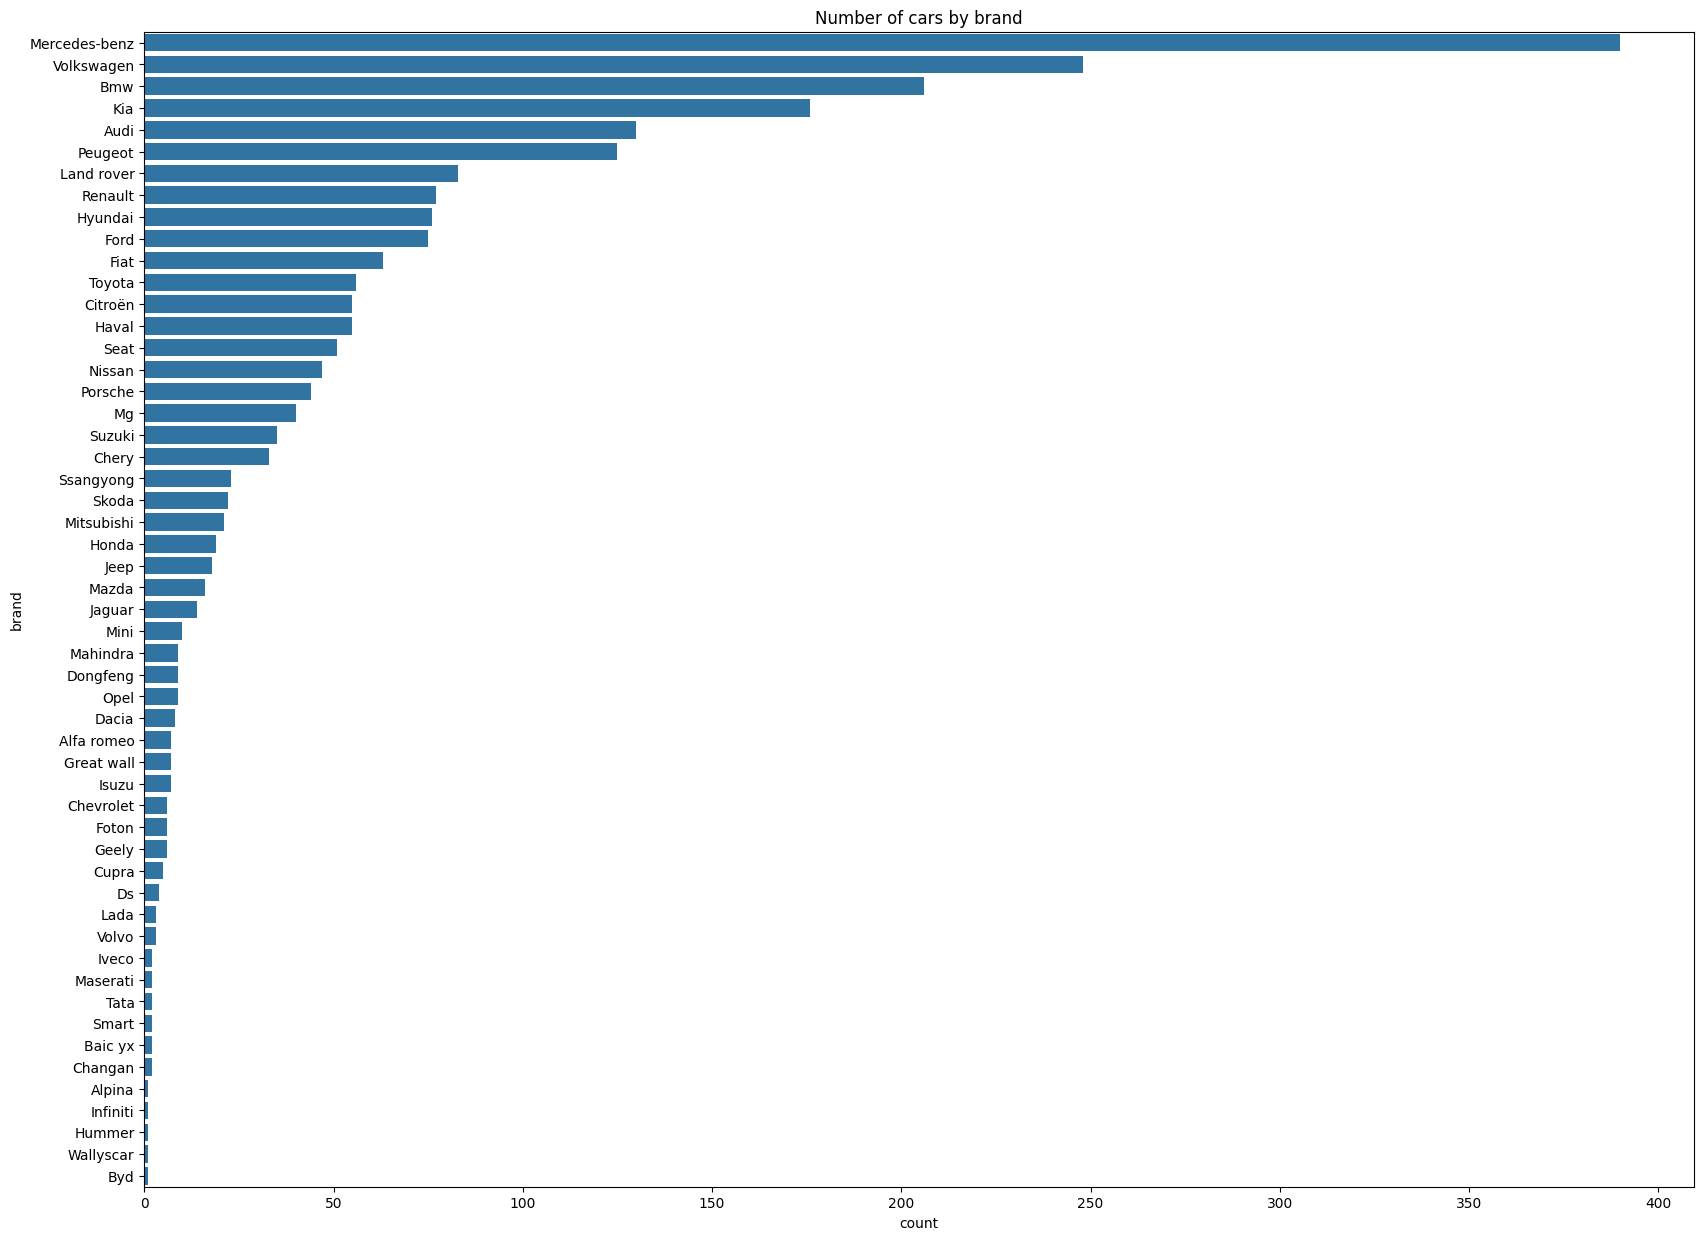

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
sns.countplot(y = df['brand'], order = df['brand'].value_counts().index)
plt.title('Number of cars by brand')
plt.show()

### Countplot of the total cars per different years

/tmp/ipykernel_522991/450688568.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['year'], palette = 'viridis', order = df['year'].value_counts().index)


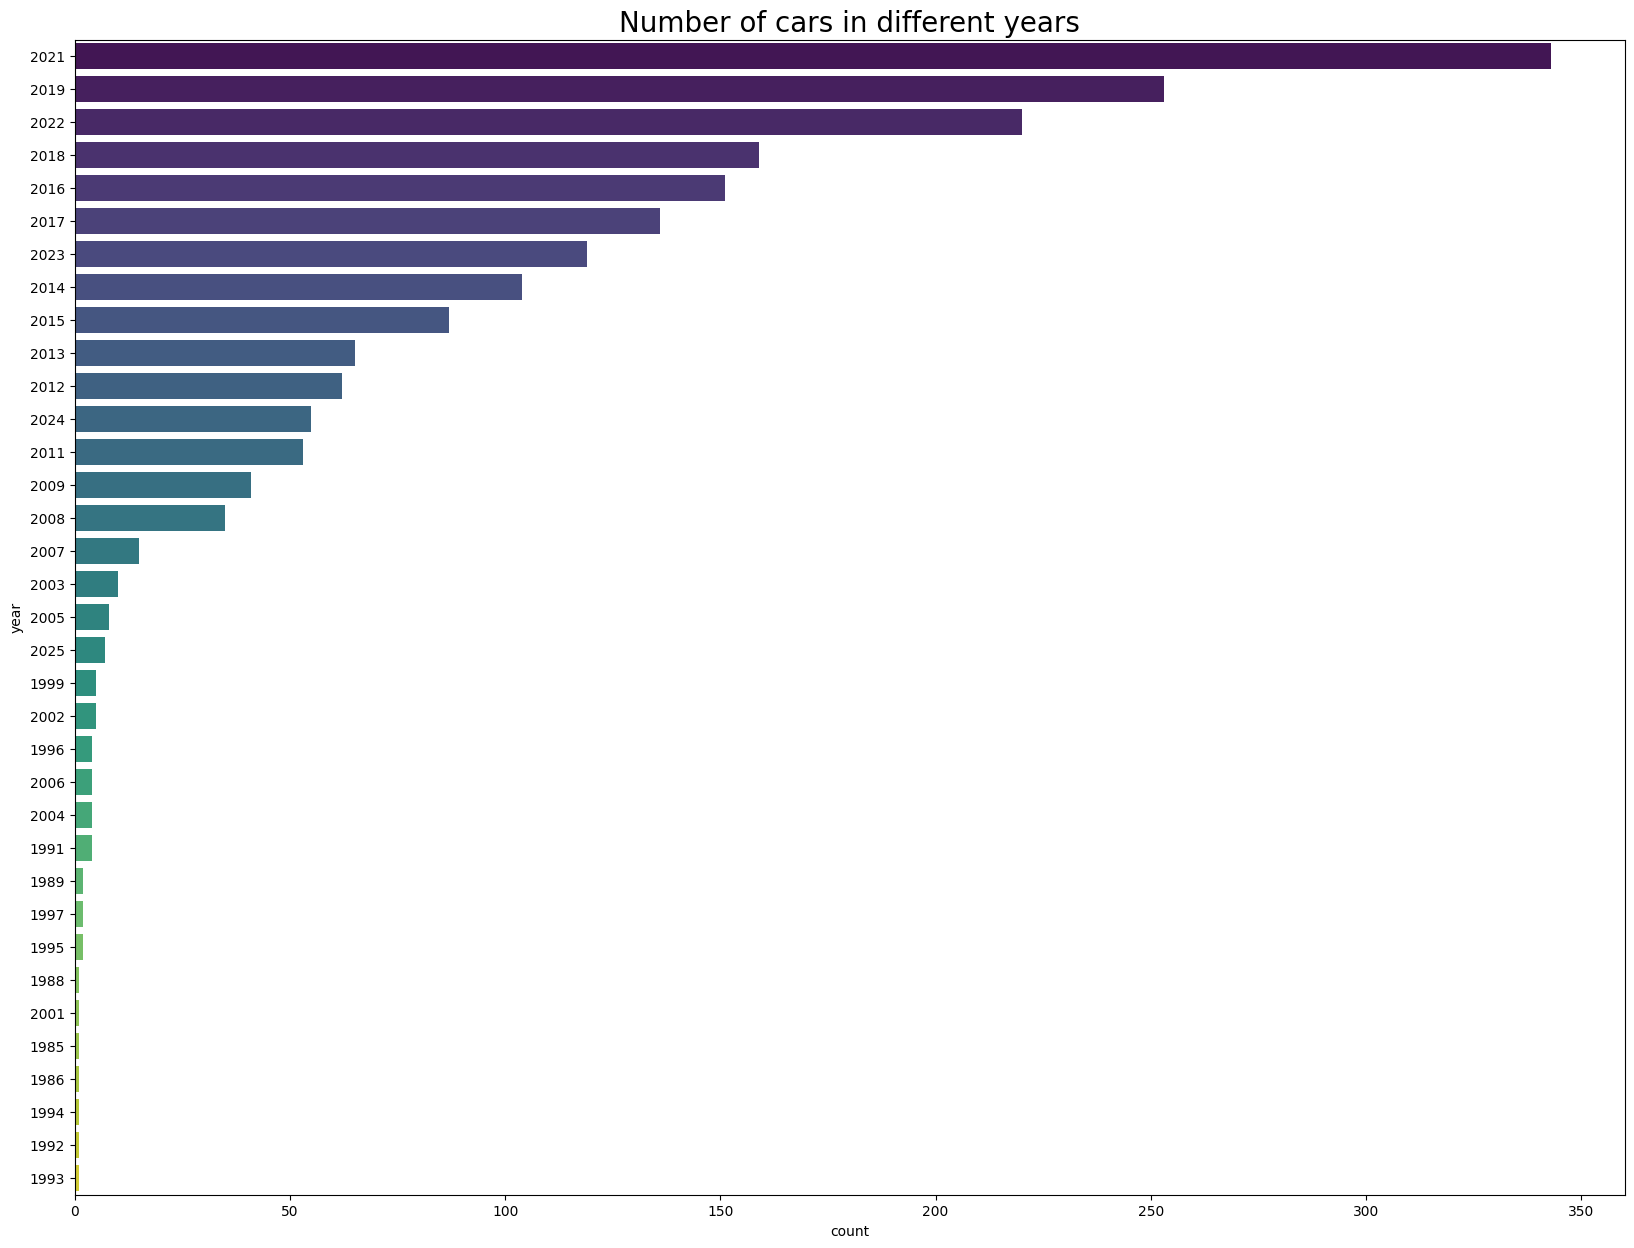

In [242]:
plt.figure(figsize = (20, 15))
sns.countplot(df['year'], palette = 'viridis', order = df['year'].value_counts().index)
plt.title("Number of cars in different years", fontsize = 20)
plt.show()

### Counting the cars based on transmission type

/tmp/ipykernel_522991/1185279034.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['transmission'], palette = 'Paired')


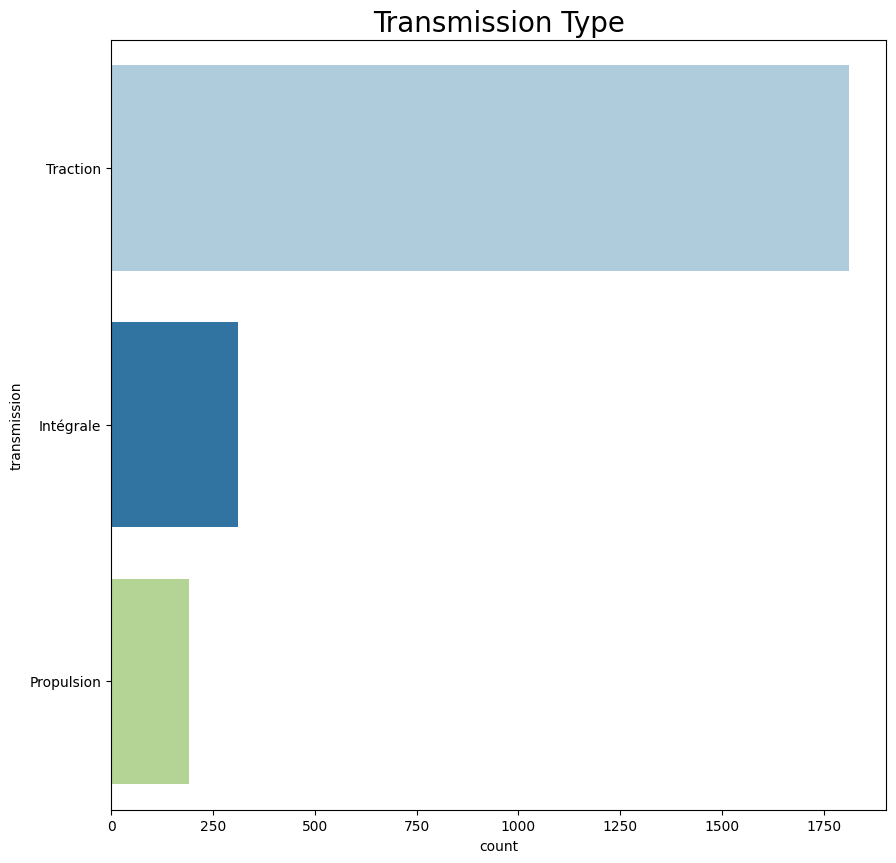

In [243]:
##ploting cars by different years convert years to str before
plt.figure(figsize = (10, 10))
sns.countplot(df['transmission'], palette = 'Paired')
plt.title("Transmission Type", fontsize = 20)
plt.show()

### Countplot of Engine Fuel Type

/tmp/ipykernel_522991/102019525.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df['fuel_type'].sort_values(ascending = False), palette = 'Dark2')


<Axes: xlabel='count', ylabel='fuel_type'>

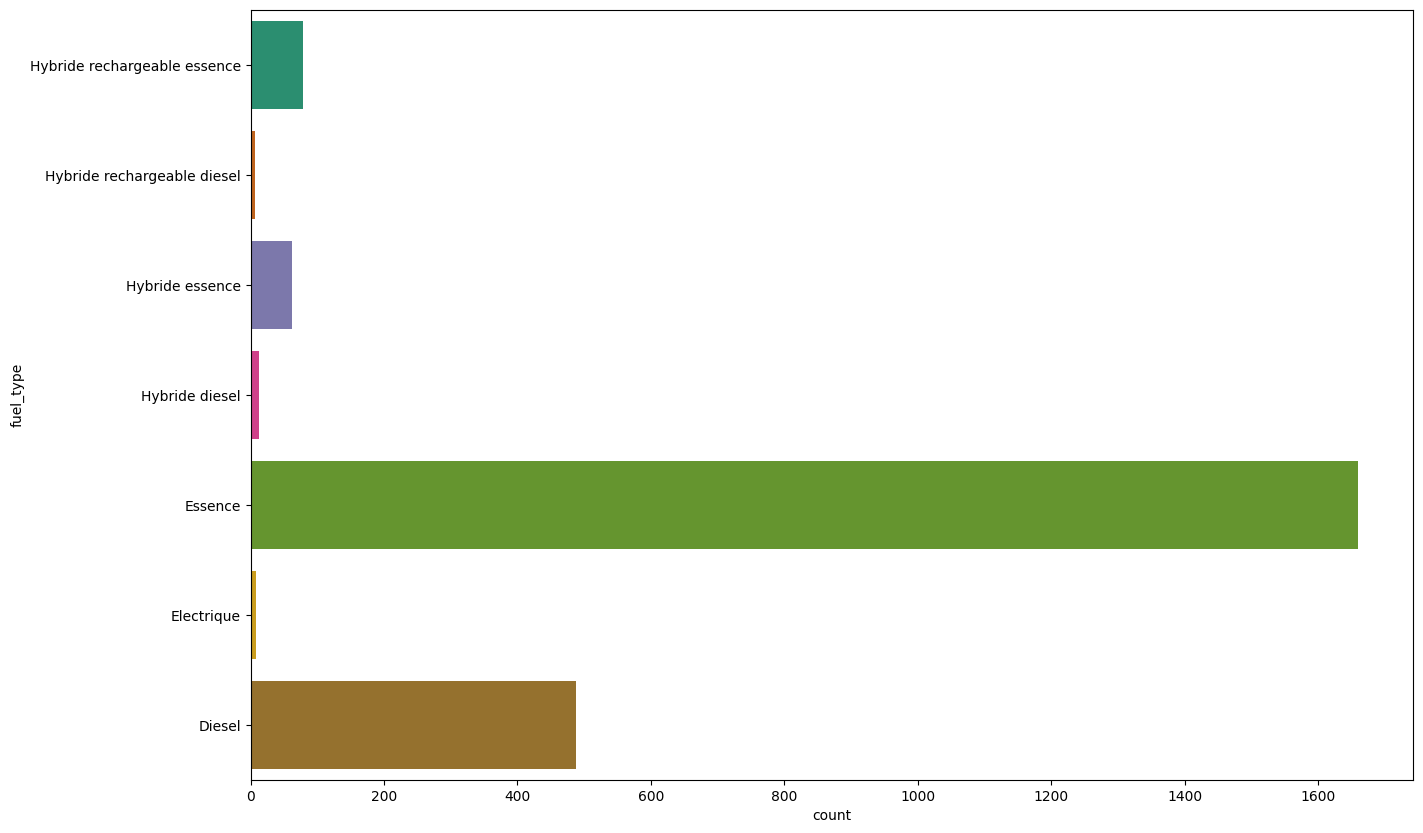

In [244]:
plt.figure(figsize = (15, 10))
sns.countplot(y = df['fuel_type'].sort_values(ascending = False), palette = 'Dark2')

### Countplot of Gearbox Type

/tmp/ipykernel_522991/3691872155.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df['gearbox'].sort_values(ascending = False), palette = 'Dark2')


<Axes: xlabel='count', ylabel='gearbox'>

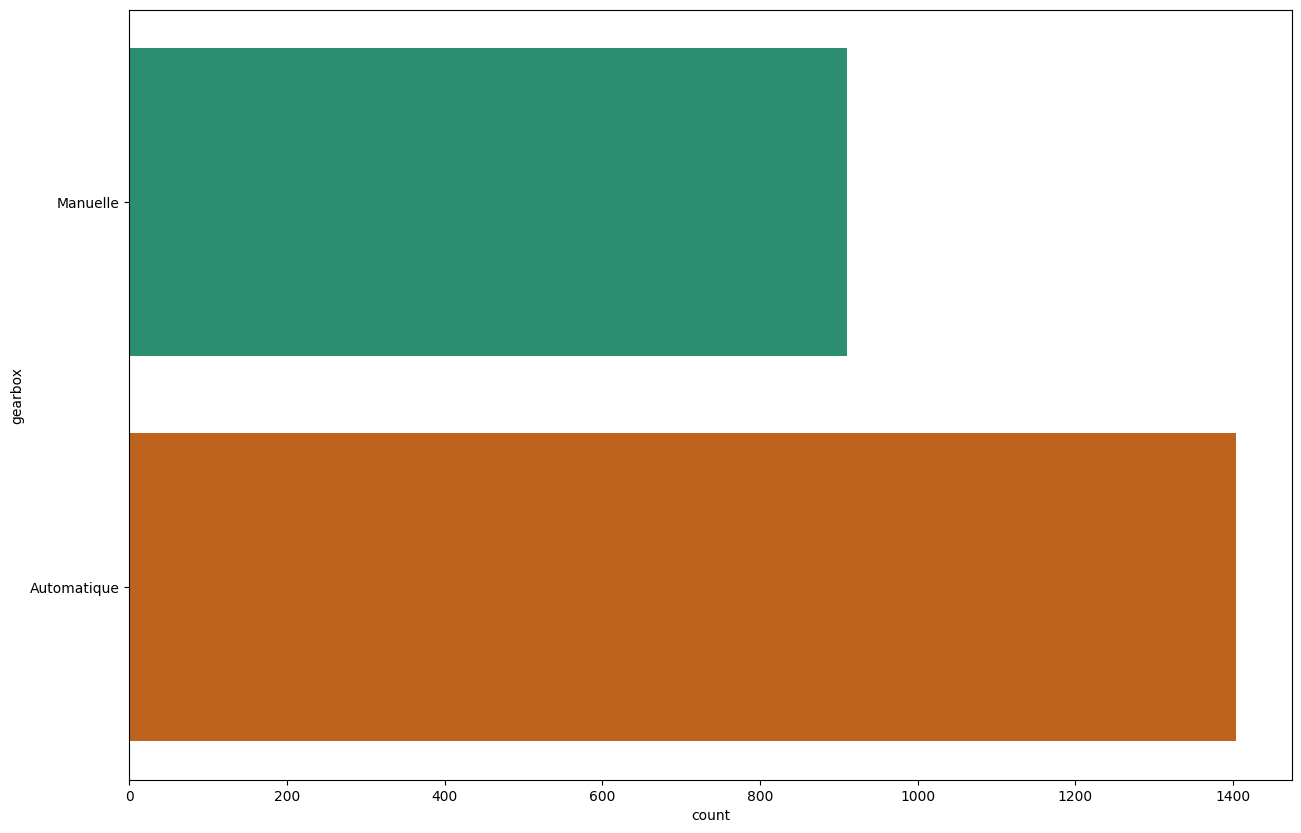

In [245]:
plt.figure(figsize = (15, 10))
sns.countplot(y = df['gearbox'].sort_values(ascending = False), palette = 'Dark2')

### Getting the unique elements from the data

In [246]:
df.nunique()

price                  2301
mileage                 422
year                     35
transmission              3
gearbox                   2
fuel_type                 7
location                 20
brand                    53
model                   314
exterior_color           14
interior_color            7
upholstery                7
seats                     7
doors                     5
fiscal_power             34
engine_displacement     162
dtype: int64

In [247]:
df.head()

,price,mileage,year,transmission,gearbox,fuel_type,location,brand,model,exterior_color,interior_color,upholstery,seats,doors,fiscal_power,engine_displacement
0,47531.0,180000,2014,Traction,Manuelle,Essence,Le Kef,Ford,Focus,Noir,Gris,Tissu,5.0,5.0,7,1595.0
1,59891.0,30000,2021,Traction,Manuelle,Essence,Tunis,Kia,Picanto,Noir,Noir,Tissu,5.0,5.0,5,1200.0
2,85882.0,201000,2014,Traction,Automatique,Essence,Ben Arous,Bmw,Série 3,Noir,Beige,Similicuir,5.0,4.0,7,1598.0
3,93782.0,55000,2022,Traction,Automatique,Essence,Ariana,Ford,Kuga,Bleu,Noir,Tissu,5.0,5.0,8,NaN
4,144371.0,19000,2021,Traction,Manuelle,Diesel,Tunis,Kia,Sportage,Gris shark,Noir,Cuir intégral,5.0,5.0,7,1599.0


### Graphical representation of missing values in our data


<Axes: >

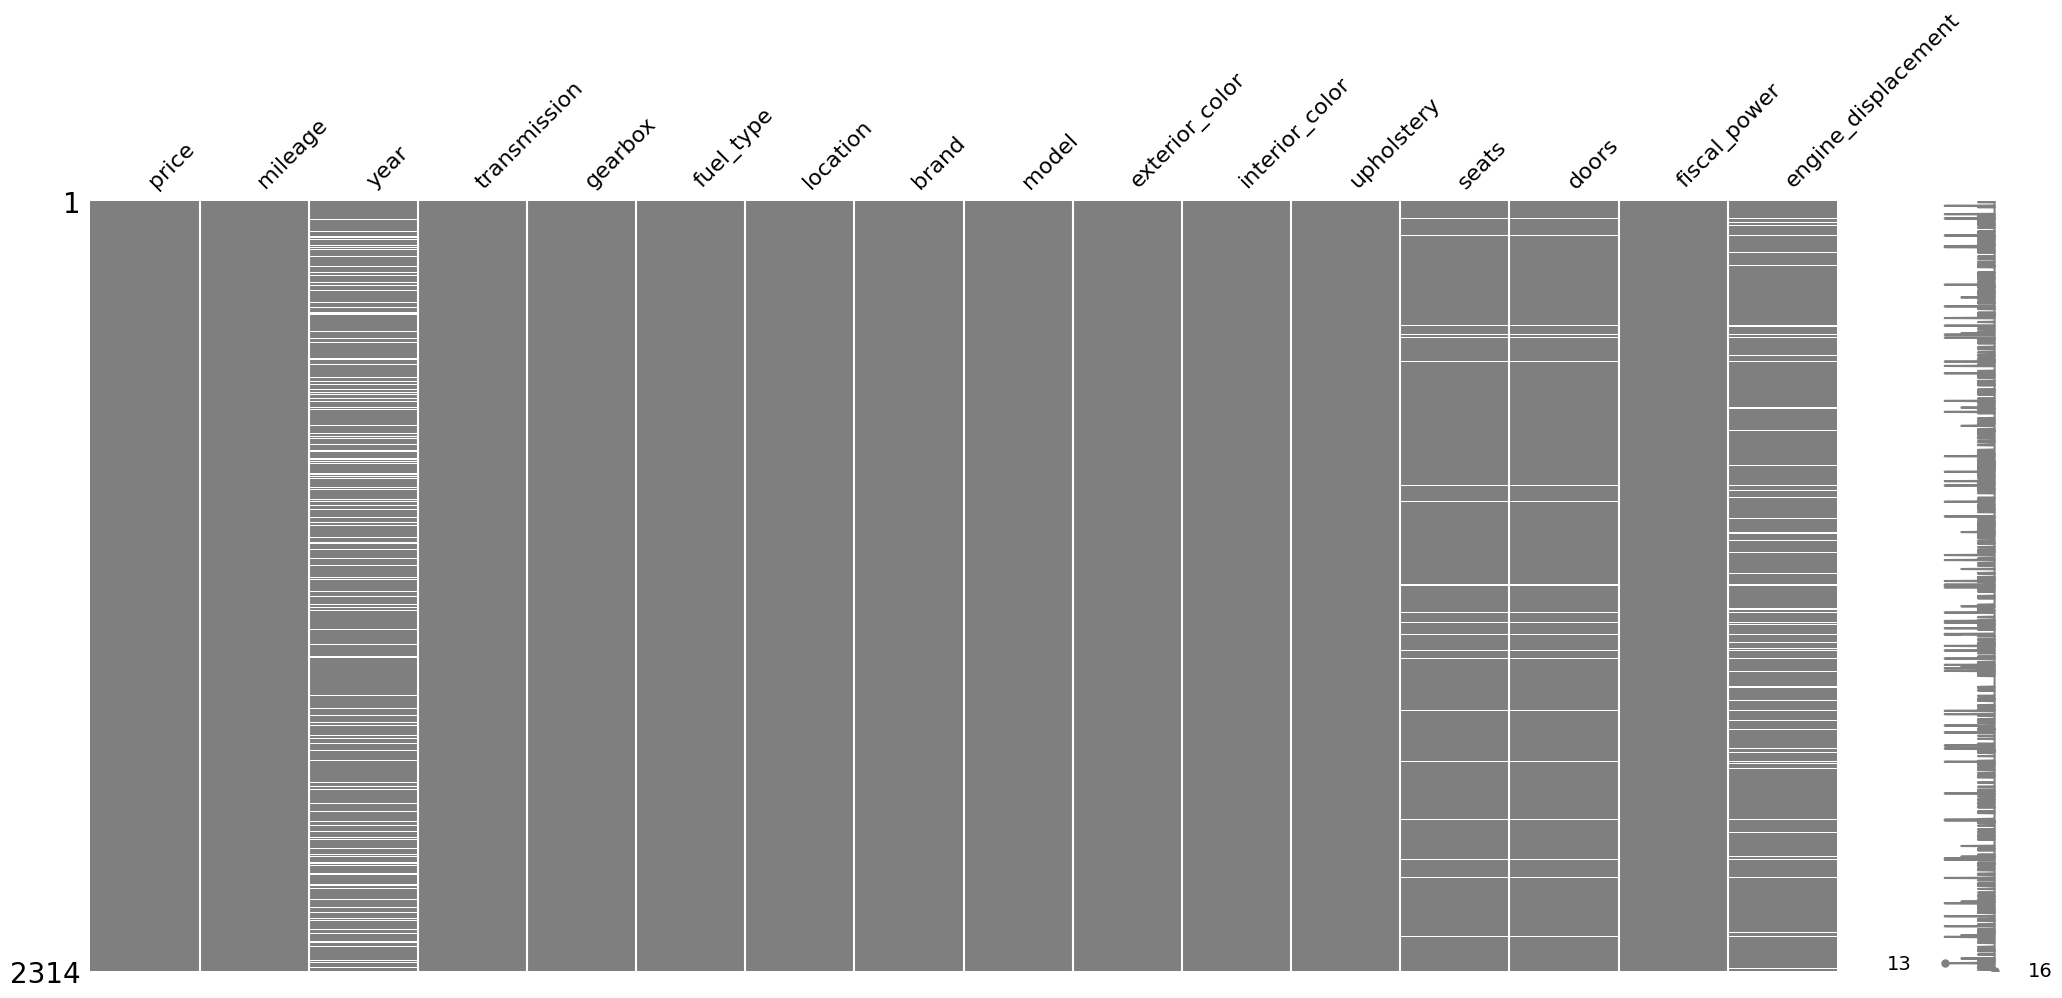

In [248]:
import missingno as msno

msno.matrix(df, color = (0.5, 0.5, 0.5))


In [249]:
df.groupby('brand')[['mileage', 'fiscal_power', 'engine_displacement', 'seats', 'doors']].agg(['min','max','mean'])

mileage                        fiscal_power                 \
                  min     max           mean          min max       mean   
brand                                                                      
Alfa romeo      37000  210000  108000.000000            5  13   7.571429   
Alpina         115000  115000  115000.000000           17  17  17.000000   
Audi              900  369000  118475.776923            5  26   9.146154   
Baic yx        110000  145000  127500.000000            7   7   7.000000   
Bmw                 0  353000  131380.538835            6  48  10.427184   
Byd             53000   53000   53000.000000           11  11  11.000000   
Changan          9000   20848   14924.000000            7  10   8.500000   
Chery               0  135000   62113.757576            6  11   8.303030   
Chevrolet       22000  163000   87666.666667            5   8   6.000000   
Citroën         31000  300000  136274.690909            4  11   5.600000   
Cupra           32000   76000   54400.000000            8  11   9.200000   
Dacia           20000  140000   67600.000000            5   6   5.375000   
Dongfeng        30000   33000   31555.555556            7   8   7.444444   
Ds             122000  150000  133500.000000            6  10   7.750000   
Fiat            13000  247000  110655.476190            4   8   4.904762   
Ford             3000  290000  128040.000000            4  28   8.120000   
Foton           35000   39000   36166.666667            9  10   9.333333   
Geely           24000   90000   62000.000000            6   6   6.000000   
Great wall      90000  136000  105571.428571            5  11   6.571429   
Haval           11000  210000   77654.581818            7  15   8.945455   
Honda           59000  184300   80504.789474            5  11   8.842105   
Hummer          44000   44000   44000.000000           31  31  31.000000   
Hyundai             0  324765   91922.105263            4  11   6.092105   
Infiniti       190000  190000  190000.000000           20  20  20.000000   
Isuzu           51000  220000  119714.285714            8   8   8.000000   
Iveco           40000   70000   55000.000000           10  10  10.000000   
Jaguar          35000  163000  121214.285714            9  17  13.500000   
Jeep            63000  300000  146833.333333            8  20  10.500000   
Kia              1000  379000  109403.784091            4  20   7.318182   
Lada            50000   58000   52666.666667            7   8   7.666667   
Land rover      19000  325000  127364.493976            8  47  14.409639   
Mahindra            0   47000   21888.888889            5   5   5.000000   
Maserati       114000  114000  114000.000000           26  26  26.000000   
Mazda          107000  221729  153376.812500            6  20   9.562500   
Mercedes-benz       0  350000  105181.733333            5  37   9.576923   
Mg               9700  198000   73827.500000            6  16   7.925000   
Mini            34000  200000   82840.000000            5  11   5.600000   
Mitsubishi      19000  500000  184427.047619            4  15   9.857143   
Nissan           6000  481000  196844.978723            5  17   7.510638   
Opel            10500  191000   59833.333333            5   8   5.555556   
Peugeot          1000  380000  120883.320000            4  11   6.296000   
Porsche          6300  249000  124924.022727           15  43  21.500000   
Renault          2000  400000  119264.532468            4   8   5.610390   
Seat             1300  273000  101442.274510            4   9   5.431373   
Skoda           30000  202000  107954.545455            4   8   6.409091   
Smart           15353  101000   58176.500000            4   5   4.500000   
Ssangyong       40000  260000  138891.391304            6  10   6.869565   
Suzuki              0  270000   94267.971429            4   9   5.085714   
Tata           220000  220000  220000.000000            7   7   7.000000   
Toyota           1000  506000  150317.982143            4  17 

### Grouping on the basis of brands with horsepower values

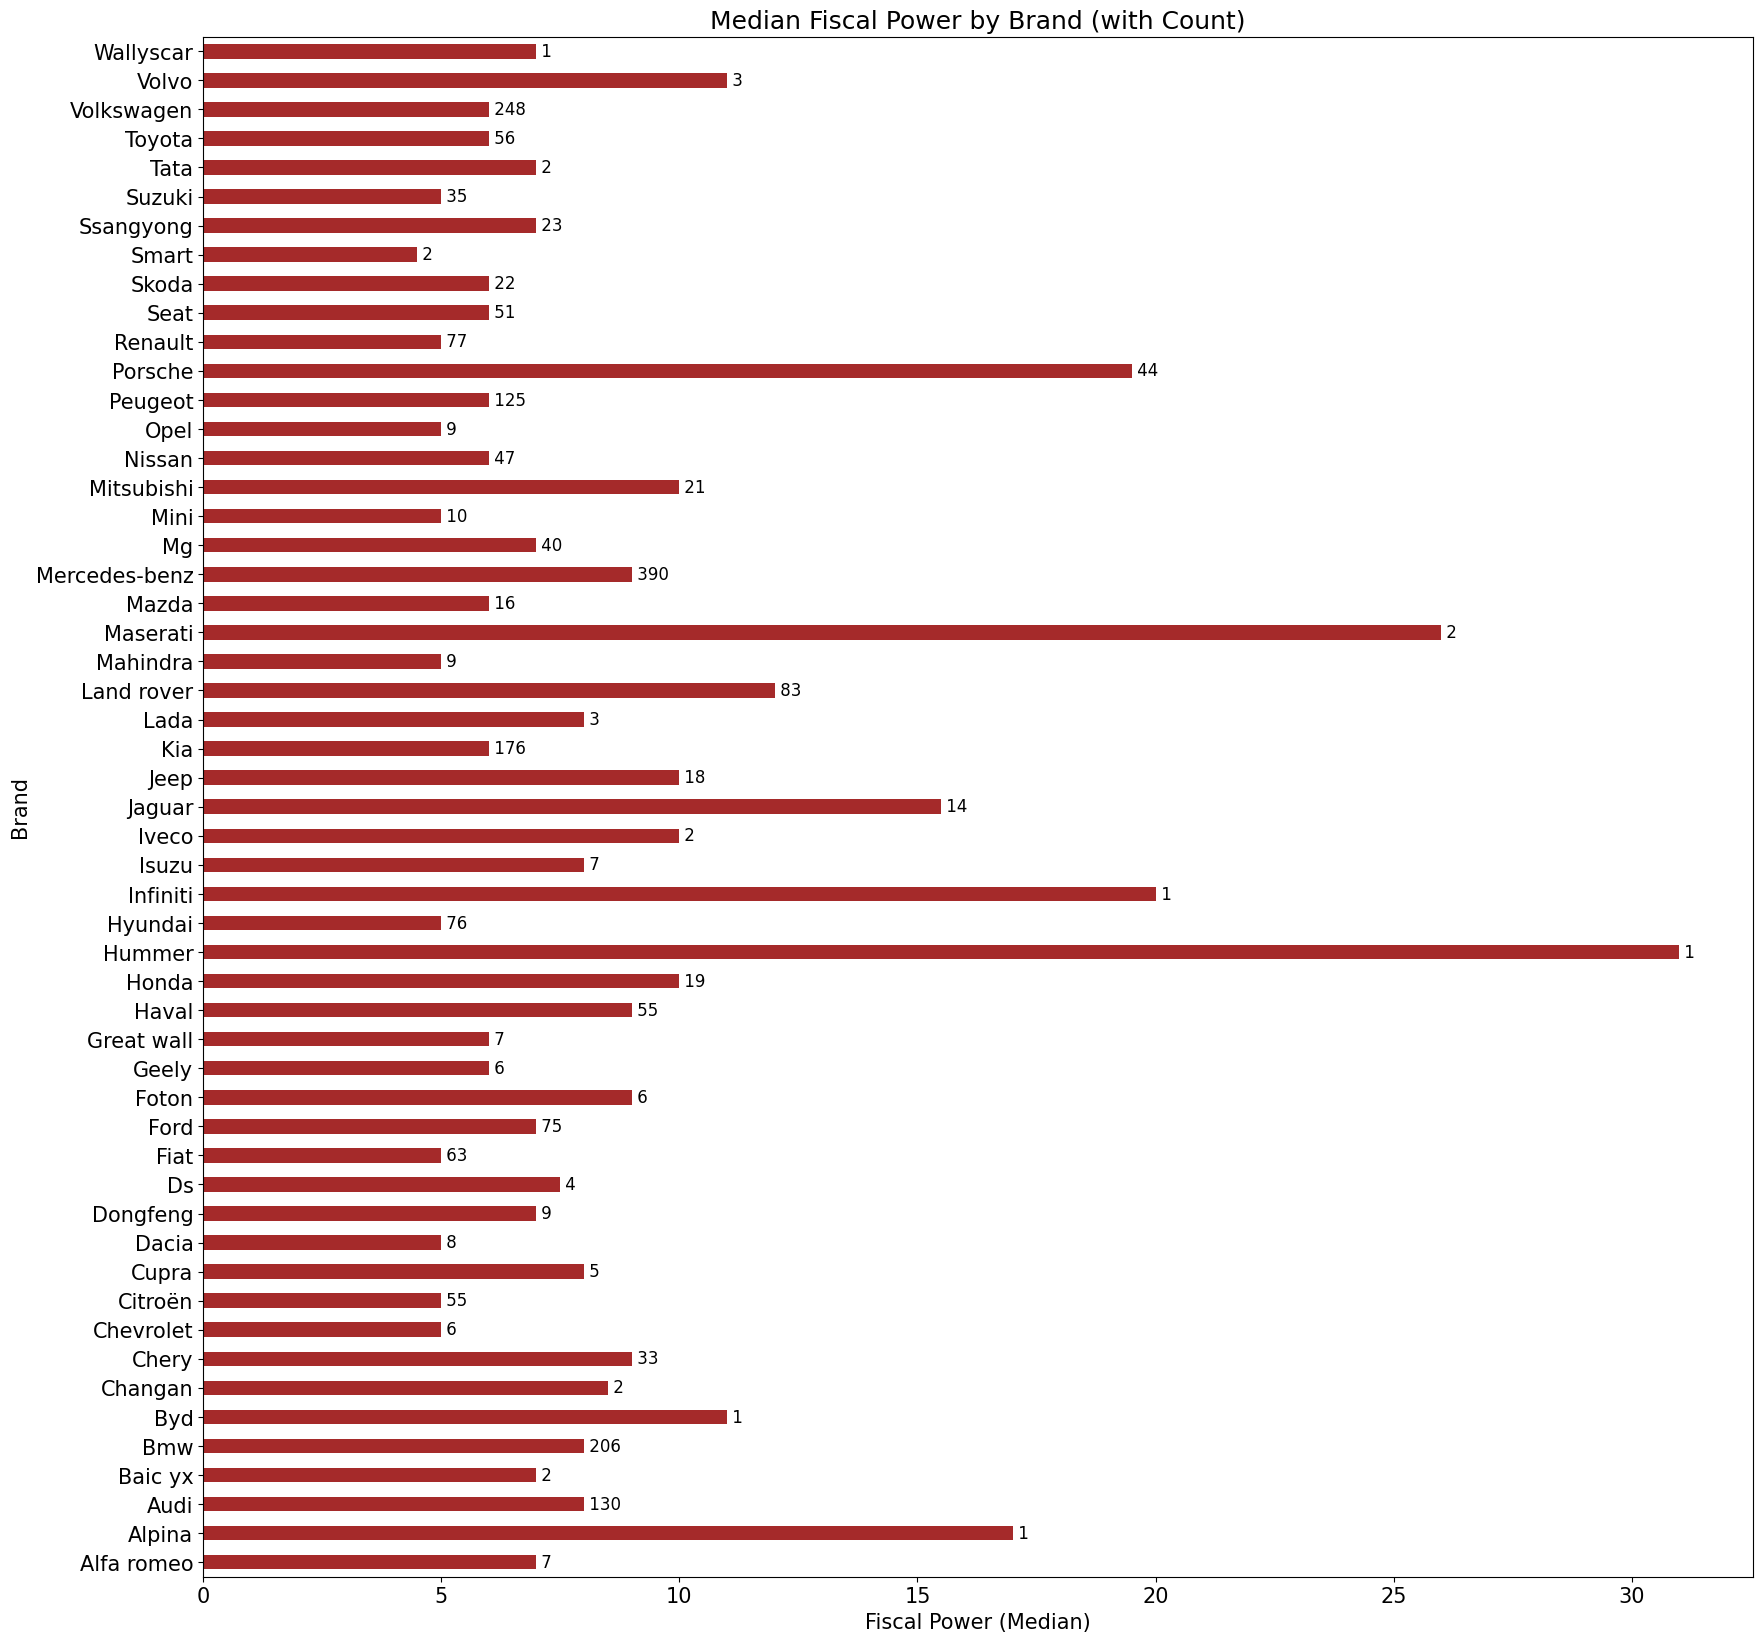

In [250]:
# Compute median and count
brand_stats = df.groupby('brand')['fiscal_power'].agg(['median', 'count']).dropna()

# Plot the median values
plt.figure(figsize=(20, 20))
ax = brand_stats['median'].plot(kind='barh', fontsize=15, color='brown')

# Add count labels to each bar
for index, (median, count) in enumerate(zip(brand_stats['median'], brand_stats['count'])):
    ax.text(median, index, f' {count}', va='center', fontsize=12, color='black')

plt.xlabel("Fiscal Power (Median)", fontsize=15)
plt.ylabel("Brand", fontsize=15)
plt.title("Median Fiscal Power by Brand (with Count)", fontsize=18)
plt.show()

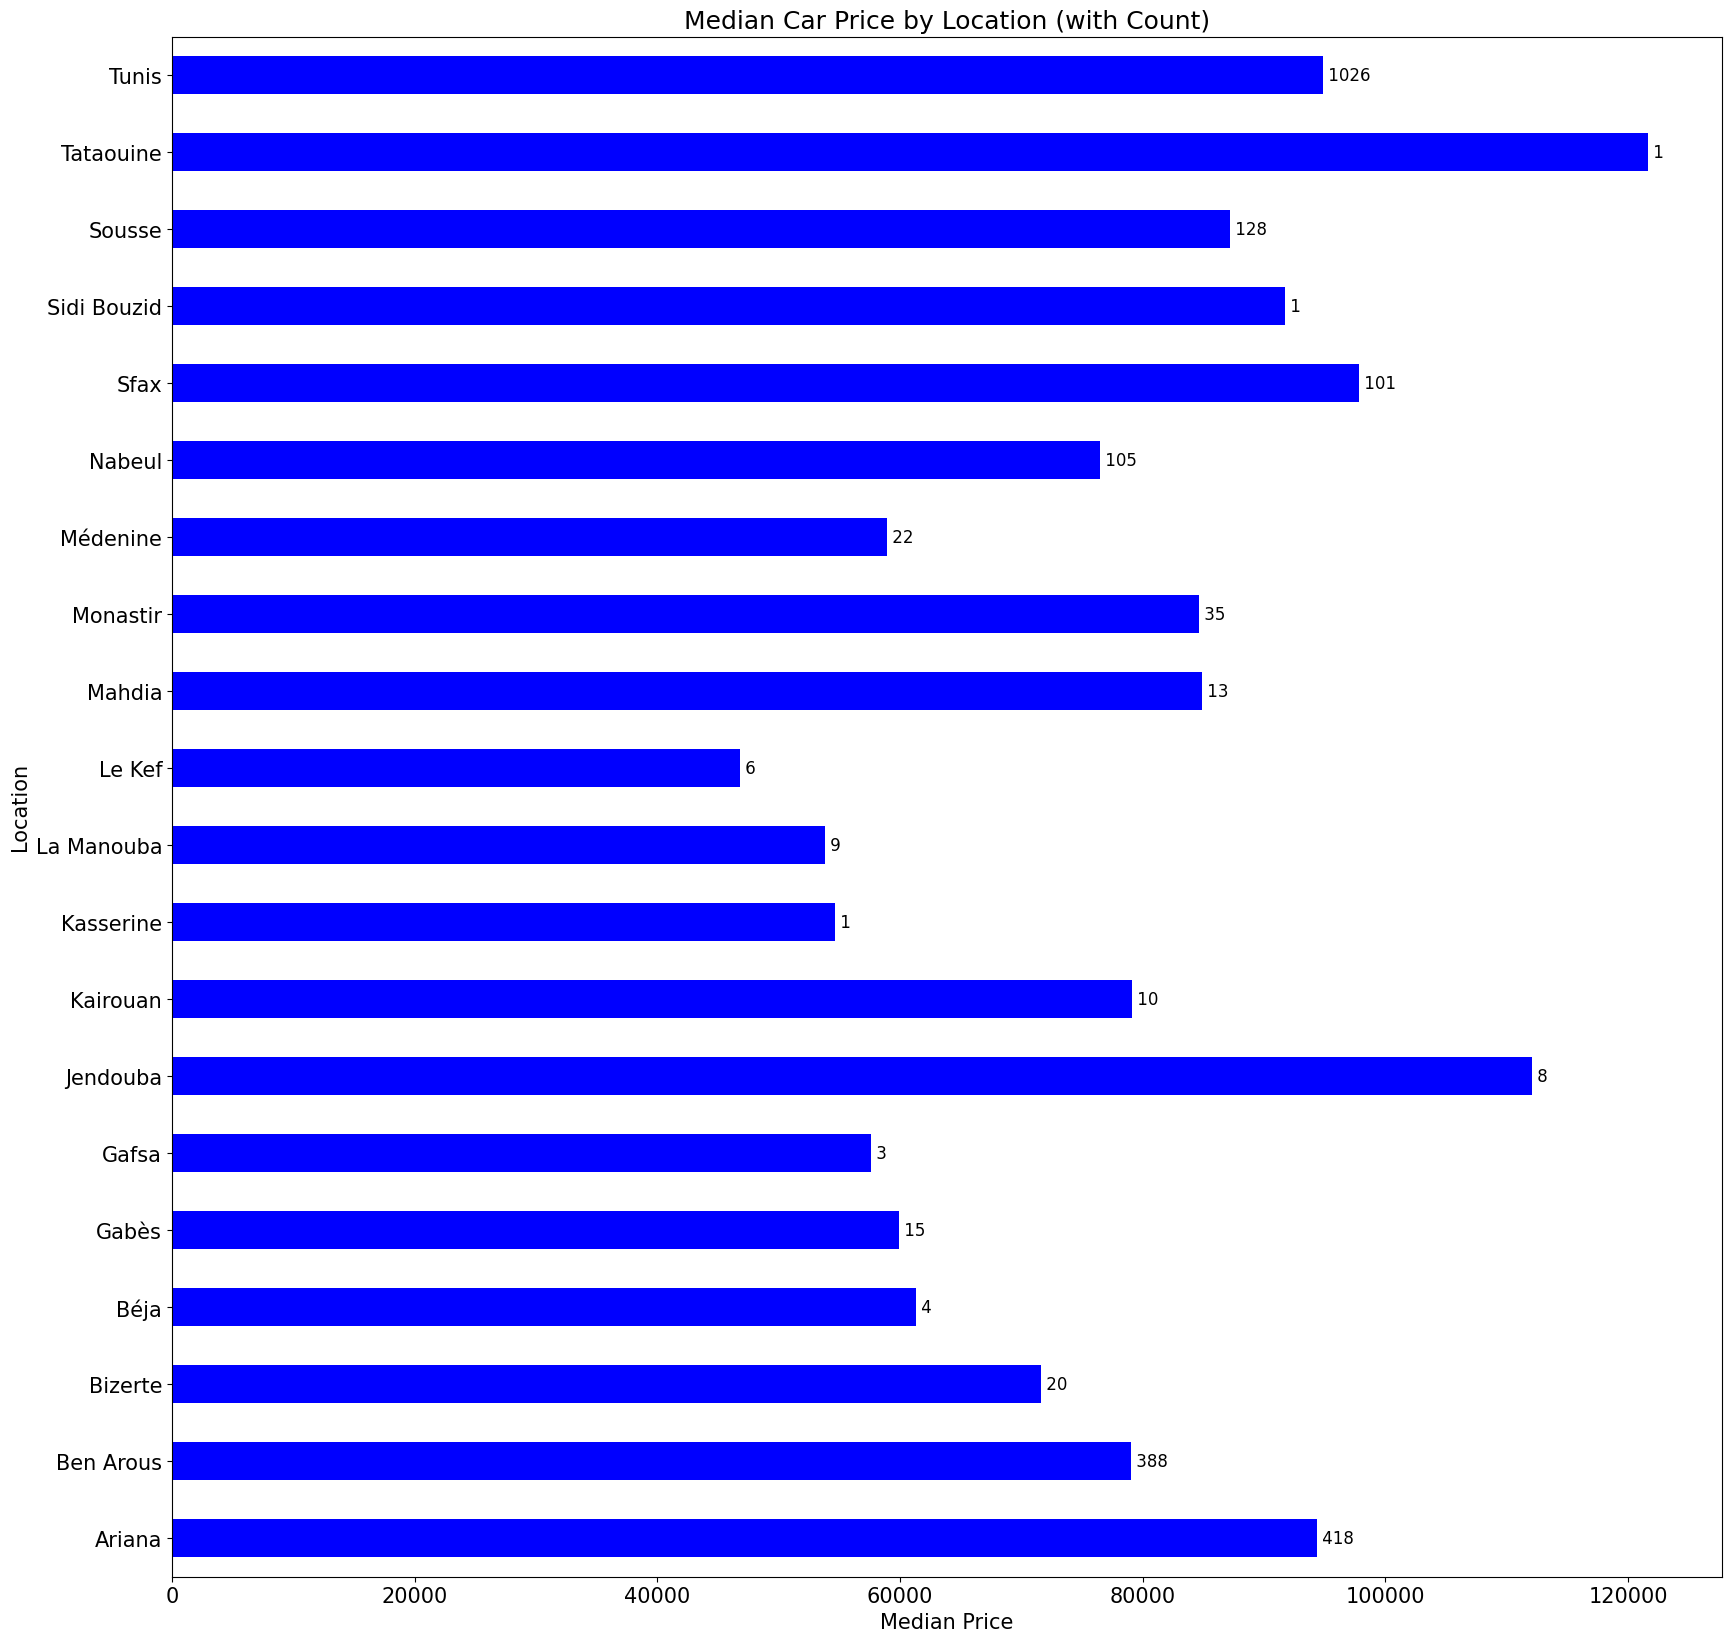

In [251]:
# Compute median price and count per location
location_stats = df.groupby('location')['price'].agg(['median', 'count']).dropna()

# Plot the median prices
plt.figure(figsize=(20, 20))
ax = location_stats['median'].plot(kind='barh', fontsize=15, color='blue')

# Add count labels to each bar
for index, (median, count) in enumerate(zip(location_stats['median'], location_stats['count'])):
    ax.text(median, index, f' {count}', va='center', fontsize=12, color='black')

plt.xlabel("Median Price", fontsize=15)
plt.ylabel("Location", fontsize=15)
plt.title("Median Car Price by Location (with Count)", fontsize=18)
plt.show()

<Figure size 2000x2000 with 0 Axes>

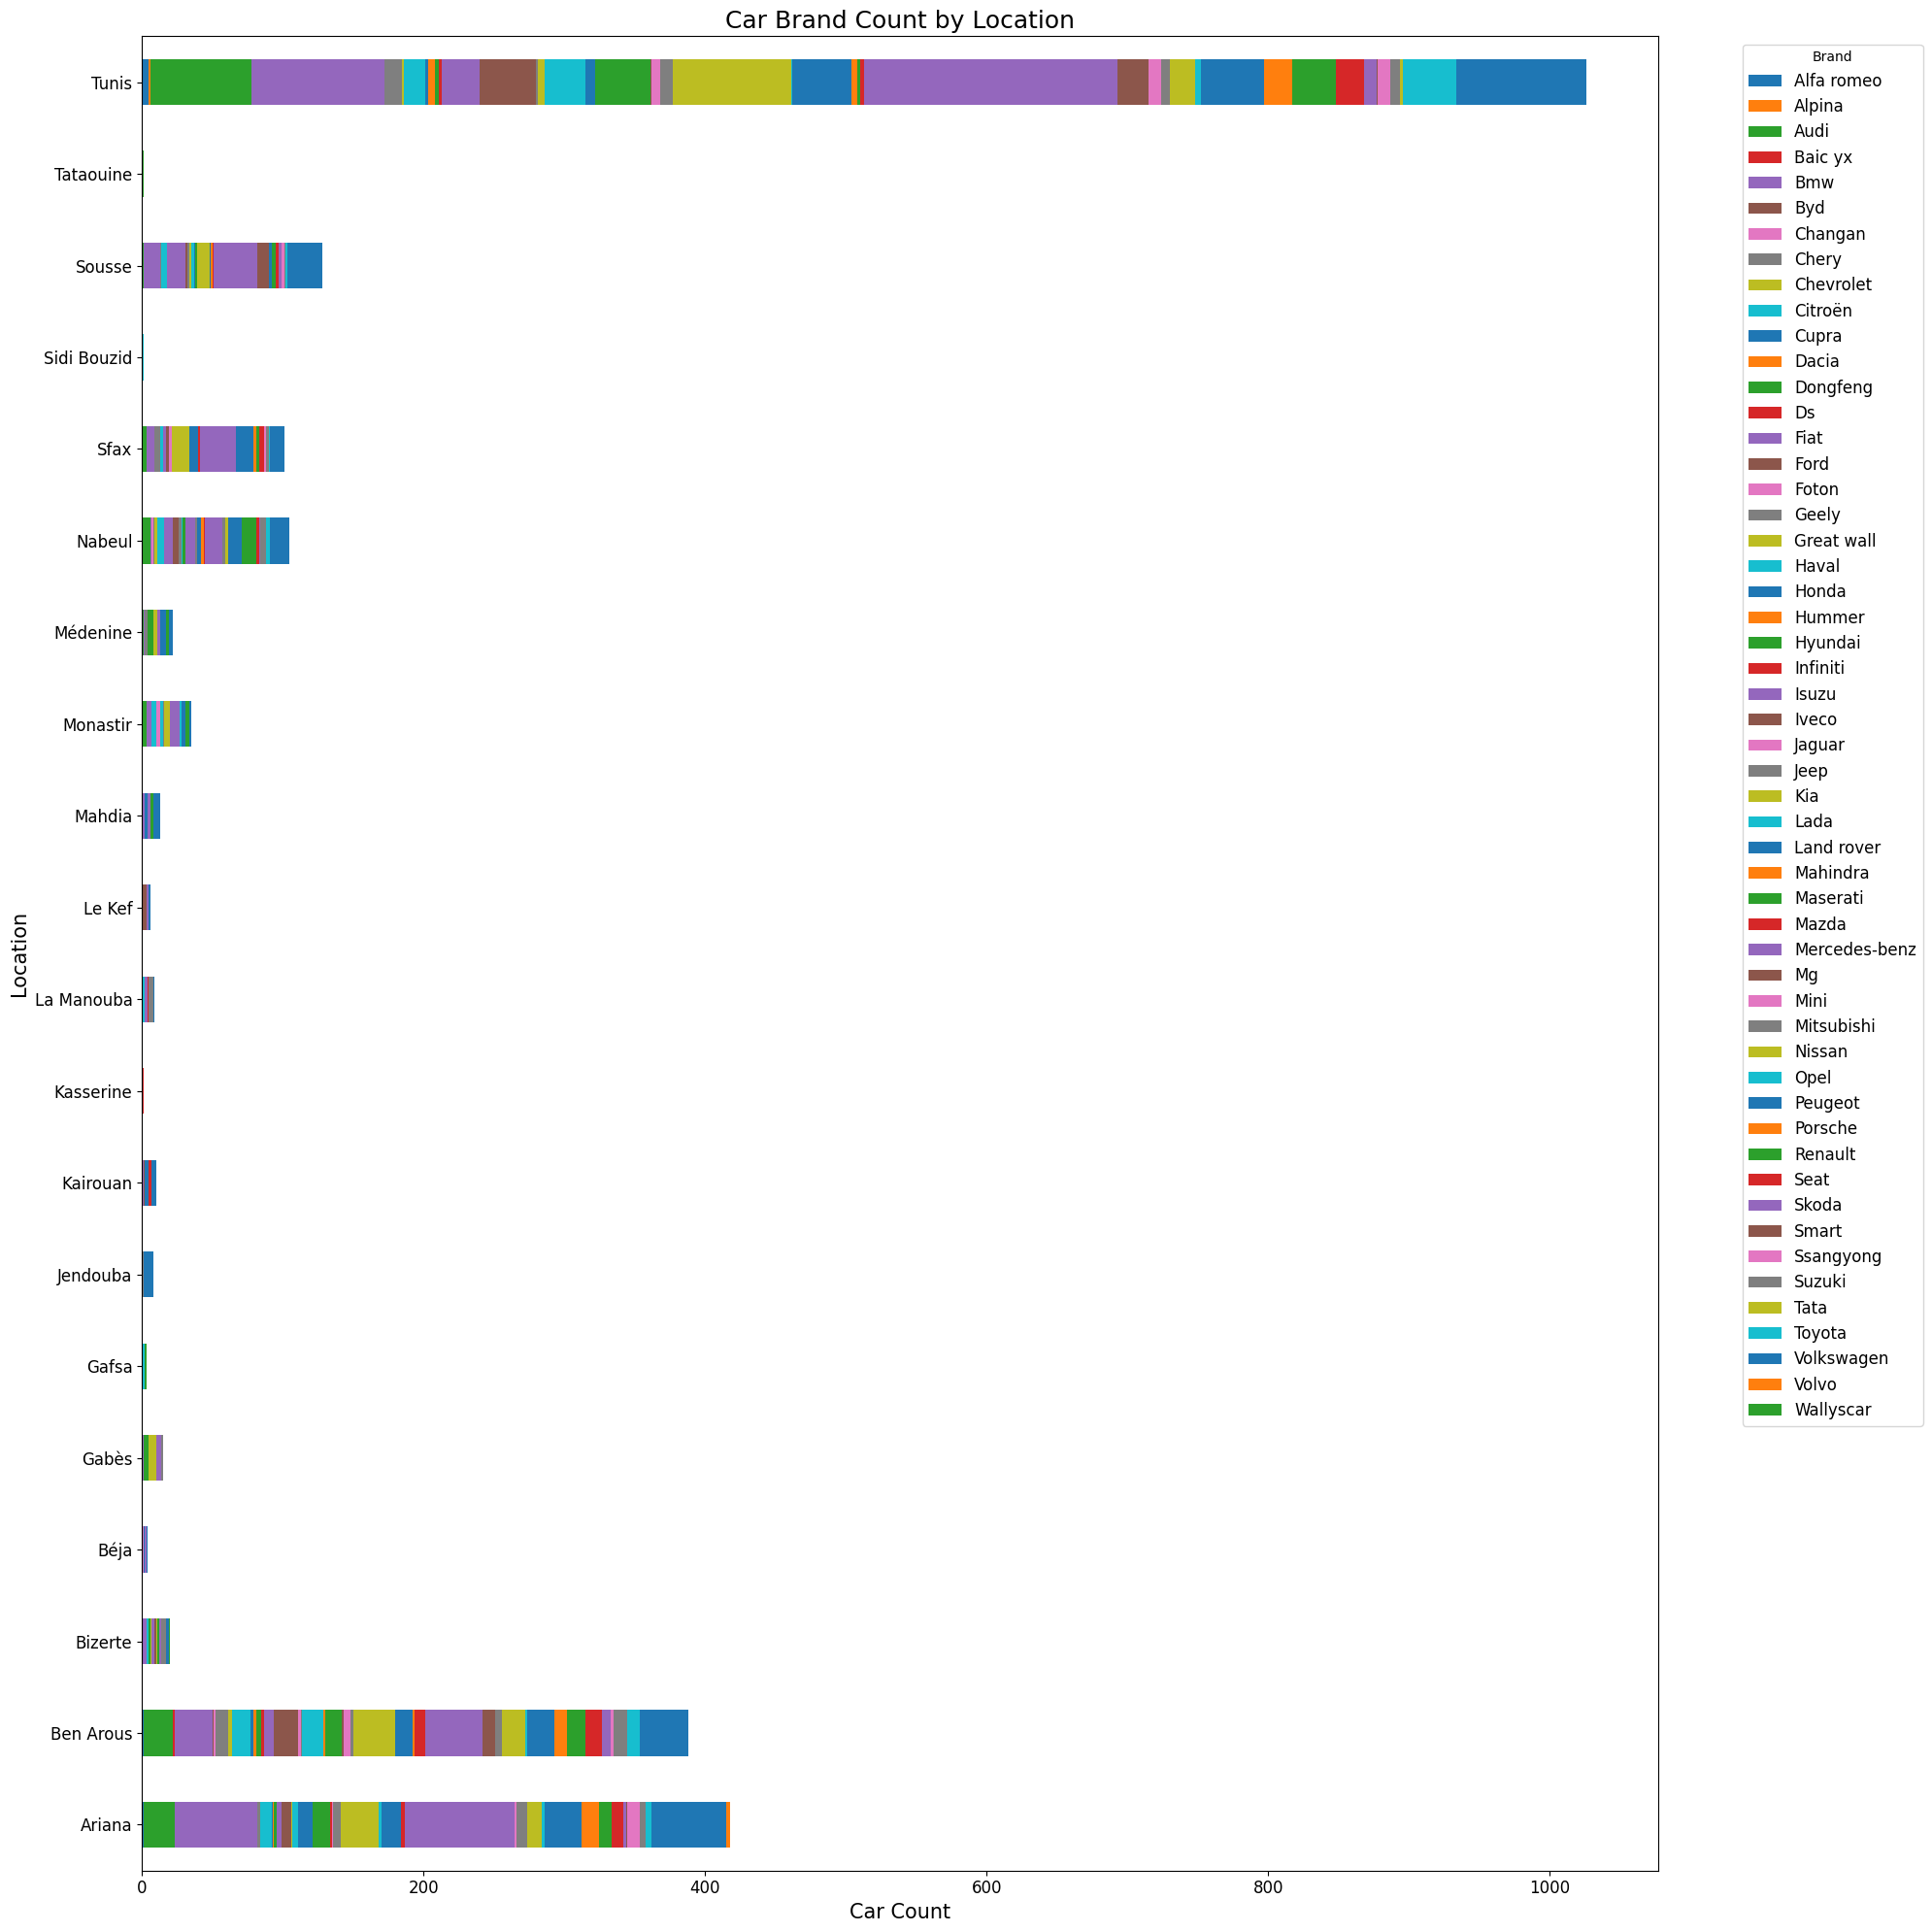

In [252]:
# Compute car brand count by location
brand_location_stats = df.groupby(['location', 'brand'])['price'].count().unstack(fill_value=0)

# Plot the car brand count by location
plt.figure(figsize=(20, 20))
ax = brand_location_stats.plot(kind='barh', stacked=True, figsize=(20, 20), fontsize=12)

plt.xlabel("Car Count", fontsize=15)
plt.ylabel("Location", fontsize=15)
plt.title("Car Brand Count by Location", fontsize=18)
plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

                        price   mileage      year  transmission   gearbox  \
price                1.000000  0.000000  0.000000      0.036743  0.013676   
mileage              0.000000  1.000000  0.481454      0.370205  0.416314   
year                 0.000000  0.481454  1.000000      0.159922  0.147444   
transmission         0.036743  0.370205  0.159922      1.000000  0.170295   
gearbox              0.013676  0.416314  0.147444      0.170295  1.000000   
fuel_type            0.067284  0.449145  0.166150      0.163850  0.176771   
location             0.079474  0.442682  0.159826      0.135801  0.198543   
brand                0.063611  0.340507  0.175072      0.272523  0.581328   
model                0.000000  0.373295  0.482899      0.398310  0.701014   
exterior_color       0.034453  0.394664  0.111073      0.077722  0.188097   
interior_color       0.000000  0.355947  0.164687      0.079046  0.251782   
upholstery           0.036943  0.340129  0.121649      0.242800  0.484202   

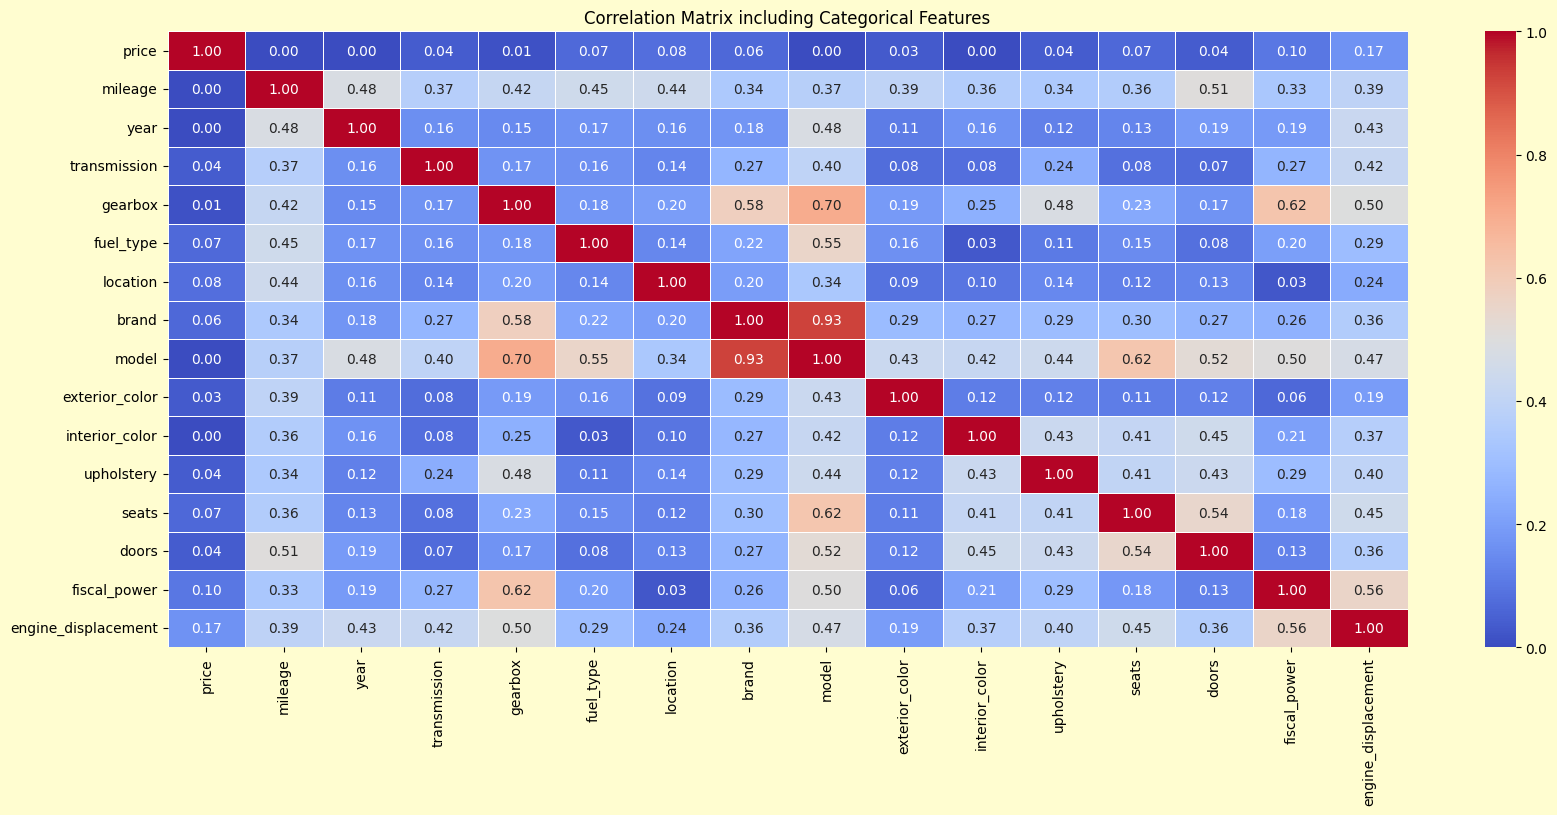

In [253]:
from dython.nominal import associations
associations_df = associations(df, nominal_columns='all', plot=False)
corr_matrix = associations_df['corr']
print(corr_matrix)
plt.figure(figsize=(20, 8))
plt.gcf().set_facecolor('#FFFDD0') 
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix including Categorical Features')
plt.show()


### Interpretation of the Correlation Matrix:

#### High Redundancy:
The brand and model features are extremely correlated (≈0.93), suggesting they carry nearly identical information and could be combined or one removed to avoid redundancy.

#### Engine Metrics:
Fiscal power and engine displacement show a moderate correlation (≈0.56), indicating that both capture similar aspects of engine performance. A composite engine performance metric could be beneficial.

#### Usage and Age:
Mileage and year have a moderate positive correlation (≈0.48). This might reflect usage patterns but also warrants checking the consistency of the year data.

#### Price Relationships:
Price has very weak correlations with most features, implying that the determinants of price may involve complex, non-linear relationships or interactions that are not captured by simple pairwise linear correlations.

#### Categorical Data Caution:
Since many categorical features were numerically encoded, some correlations may be misleading and should be interpreted carefully.

      price  mileage    year transmission      gearbox fuel_type   location  \
0   47531.0   180000  2014.0     Traction     Manuelle   Essence     Le Kef   
1   59891.0    30000  2021.0     Traction     Manuelle   Essence      Tunis   
2   85882.0   201000  2014.0     Traction  Automatique   Essence  Ben Arous   
3   93782.0    55000  2022.0     Traction  Automatique   Essence     Ariana   
4  144371.0    19000  2021.0     Traction     Manuelle    Diesel      Tunis   

  brand     model exterior_color interior_color     upholstery  seats  doors  \
0  Ford     Focus           Noir           Gris          Tissu    5.0    5.0   
1   Kia   Picanto           Noir           Noir          Tissu    5.0    5.0   
2   Bmw   Série 3           Noir          Beige     Similicuir    5.0    4.0   
3  Ford      Kuga           Bleu           Noir          Tissu    5.0    5.0   
4   Kia  Sportage     Gris shark           Noir  Cuir intégral    5.0    5.0   

   fiscal_power  engine_displacement  
0    

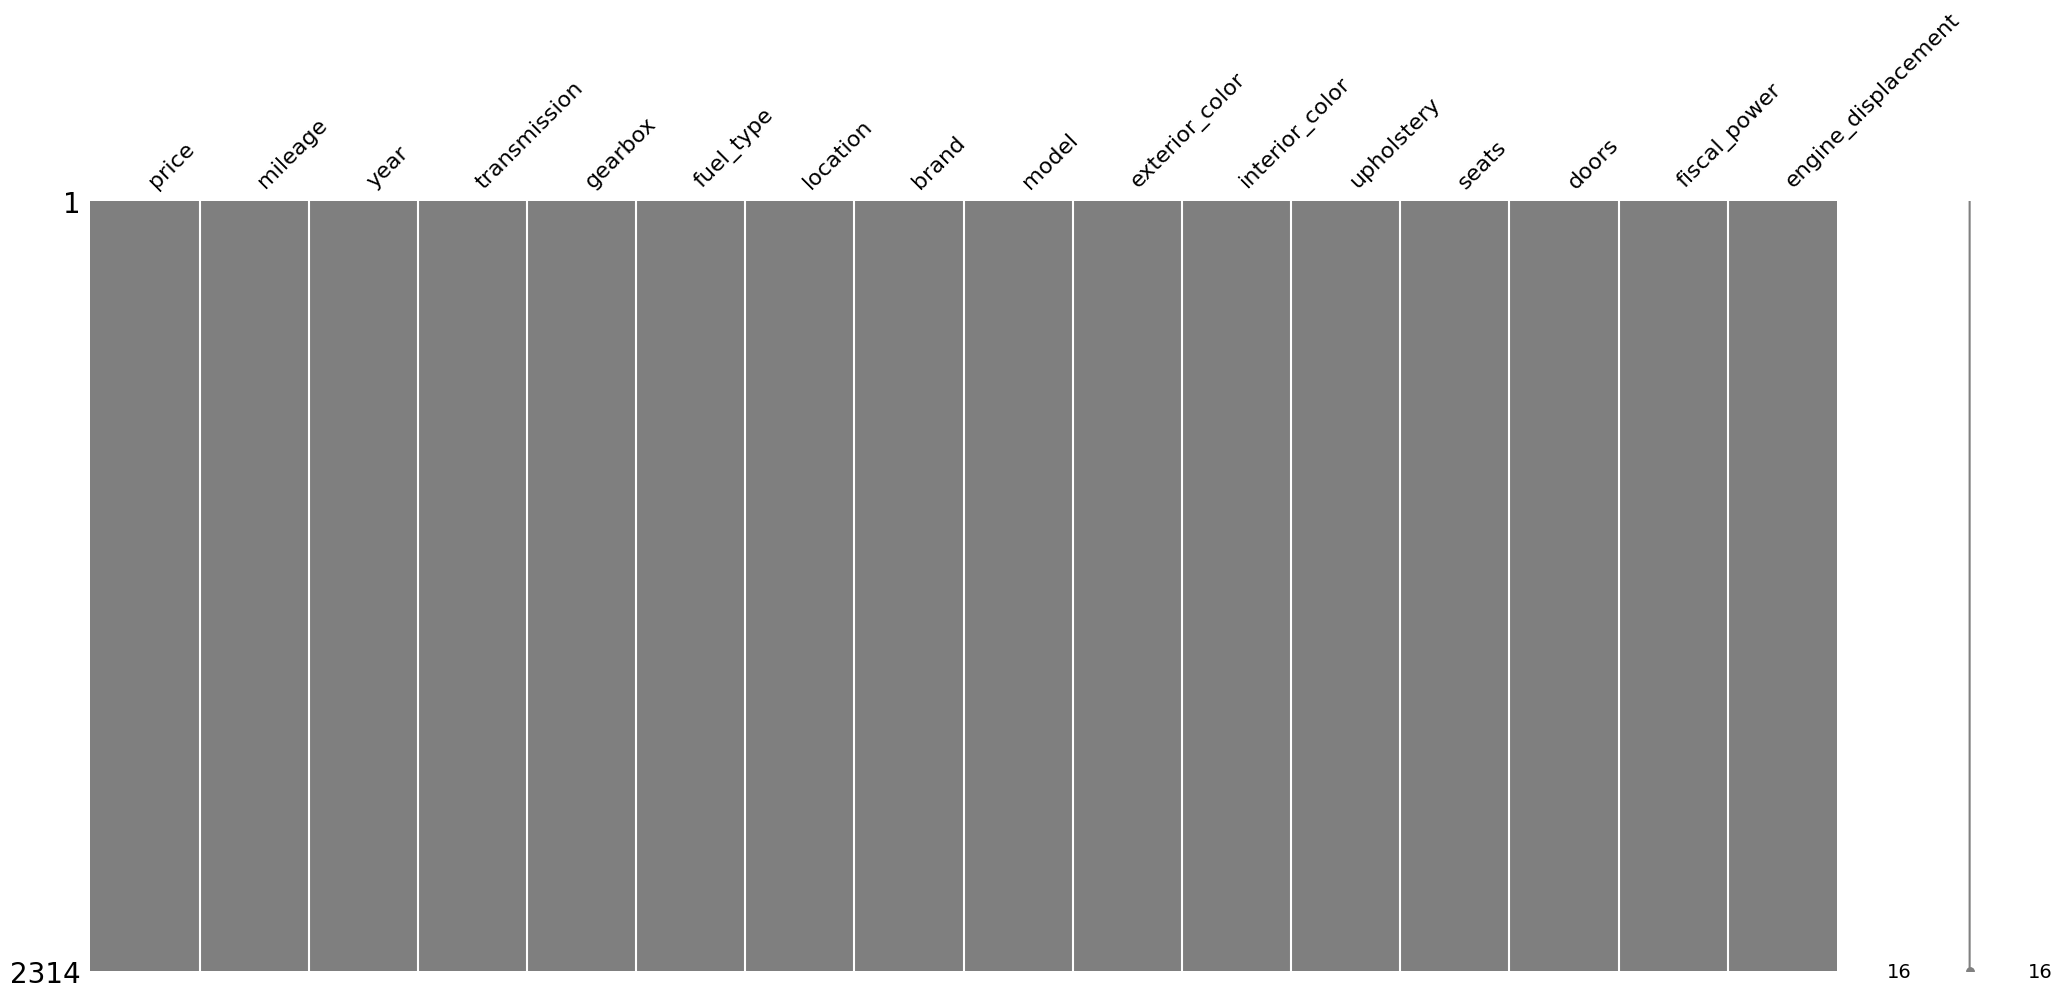

In [254]:
from sklearn.preprocessing import LabelEncoder  

# Convert 'year' column to numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')

for col in df.columns:
    if df[col].dtype == 'object':  # Categorical columns
        df[col] = df[col].fillna(df[col].mode()[0])  # Fill with mode
    else:  # Numerical columns
        df[col] = df[col].fillna(df[col].median())  # Fill with median

X = df

print(X.head())

# Split into features and target.
# X = df.drop(columns=['price'])
# y = df['price']


categorical_cols = ['fuel_type', 'brand', 'model', 'upholstery', 'gearbox', 'transmission', 'location', 'exterior_color', 'interior_color']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  # Transform categorical columns to numerical labels.
    label_encoders[col] = le

print(len(label_encoders.items()))
for col, le in label_encoders.items():
    print(f"Column: {col}")
    for idx, class_ in enumerate(le.classes_):
        print(f"  {class_} -> {idx}")
    print()


##handle missing values
X = X.fillna(X.median())




##want to seve it into csv
msno.matrix(df, color = (0.5, 0.5, 0.5))

##max and min value for each column
df.describe().loc[['min', 'max']].T

X.to_csv("X.csv", index=False)


In [255]:
df = pd.read_csv("X.csv")
import numpy as np
##car age 
import datetime
df['age'] = datetime.datetime.now().year - df['year'].astype(int)

##mileage per year
df['mileage_per_year'] = df['mileage'] / df['age']


##seats per doors ratio
df['seats_per_doors'] = df['seats'] / df['doors']

##mileage efficiency helps gauge how efficient the engine is in terms of fuel usage relative to its displacement.
df['mileage_efficiency'] = df['engine_displacement'] / df['mileage']




##engine_fiscal_interaction
df['engine_fiscal_interaction'] = df['engine_displacement'] * df['fiscal_power']

## Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

## Handle NaN values (e.g., fill with median)
df.fillna(df.median(), inplace=True)

##normalize all the columns that contains numerical values
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
##apply it to specefic columns price, mileage, fiscal_power, engine_displacement, age, mileage_per_year, seats_per_doors, mileage_efficiency, price_per_fiscal_power, price_per_engine_displacement, price_per_mileage, price_per_year, engine_fiscal_interaction
# df[['price', 'mileage', 'fiscal_power', 'engine_displacement', 'age', 'mileage_per_year', 'seats_per_doors', 'mileage_efficiency', 'price_per_fiscal_power', 'price_per_engine_displacement', 'price_per_mileage', 'price_per_year', 'engine_fiscal_interaction']] = scaler.fit_transform(df[['price', 'mileage', 'fiscal_power', 'engine_displacement', 'age', 'mileage_per_year', 'seats_per_doors', 'mileage_efficiency', 'price_per_fiscal_power', 'price_per_engine_displacement', 'price_per_mileage', 'price_per_year', 'engine_fiscal_interaction']])
df[['mileage', 'fiscal_power', 'engine_displacement', 'age', 'mileage_per_year', 'seats_per_doors', 'mileage_efficiency', 'engine_fiscal_interaction']] = scaler.fit_transform(df[['mileage', 'fiscal_power', 'engine_displacement', 'age', 'mileage_per_year', 'seats_per_doors', 'mileage_efficiency', 'engine_fiscal_interaction']])
df.head()

##save the scaler
import joblib
joblib.dump(scaler, 'scaler.pkl')

df.to_csv("final_data.csv", index=False)


/home/samer/ml_gl4/env/lib/python3.10/site-packages/dython/nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/home/samer/ml_gl4/env/lib/python3.10/site-packages/dython/nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/home/samer/ml_gl4/env/lib/python3.10/site-packages/dython/nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/home/samer/ml_gl4/env/lib/python3.10/site-packages/dython/nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_corr

                                  price   mileage      year  transmission  \
price                          1.000000  0.000000  0.000000      0.036743   
mileage                        0.000000  1.000000  0.484402      0.370205   
year                           0.000000  0.484402  1.000000      0.154221   
transmission                   0.036743  0.370205  0.154221      1.000000   
gearbox                        0.013676  0.416314  0.148686      0.170295   
fuel_type                      0.067284  0.449145  0.162986      0.163850   
location                       0.079474  0.442682  0.157011      0.135801   
brand                          0.063611  0.340507  0.176564      0.272523   
model                          0.000000  0.373295  0.486794      0.398310   
exterior_color                 0.034453  0.394664  0.111496      0.077722   
interior_color                 0.000000  0.355947  0.164566      0.079046   
upholstery                     0.036943  0.340129  0.118538      0.242800   

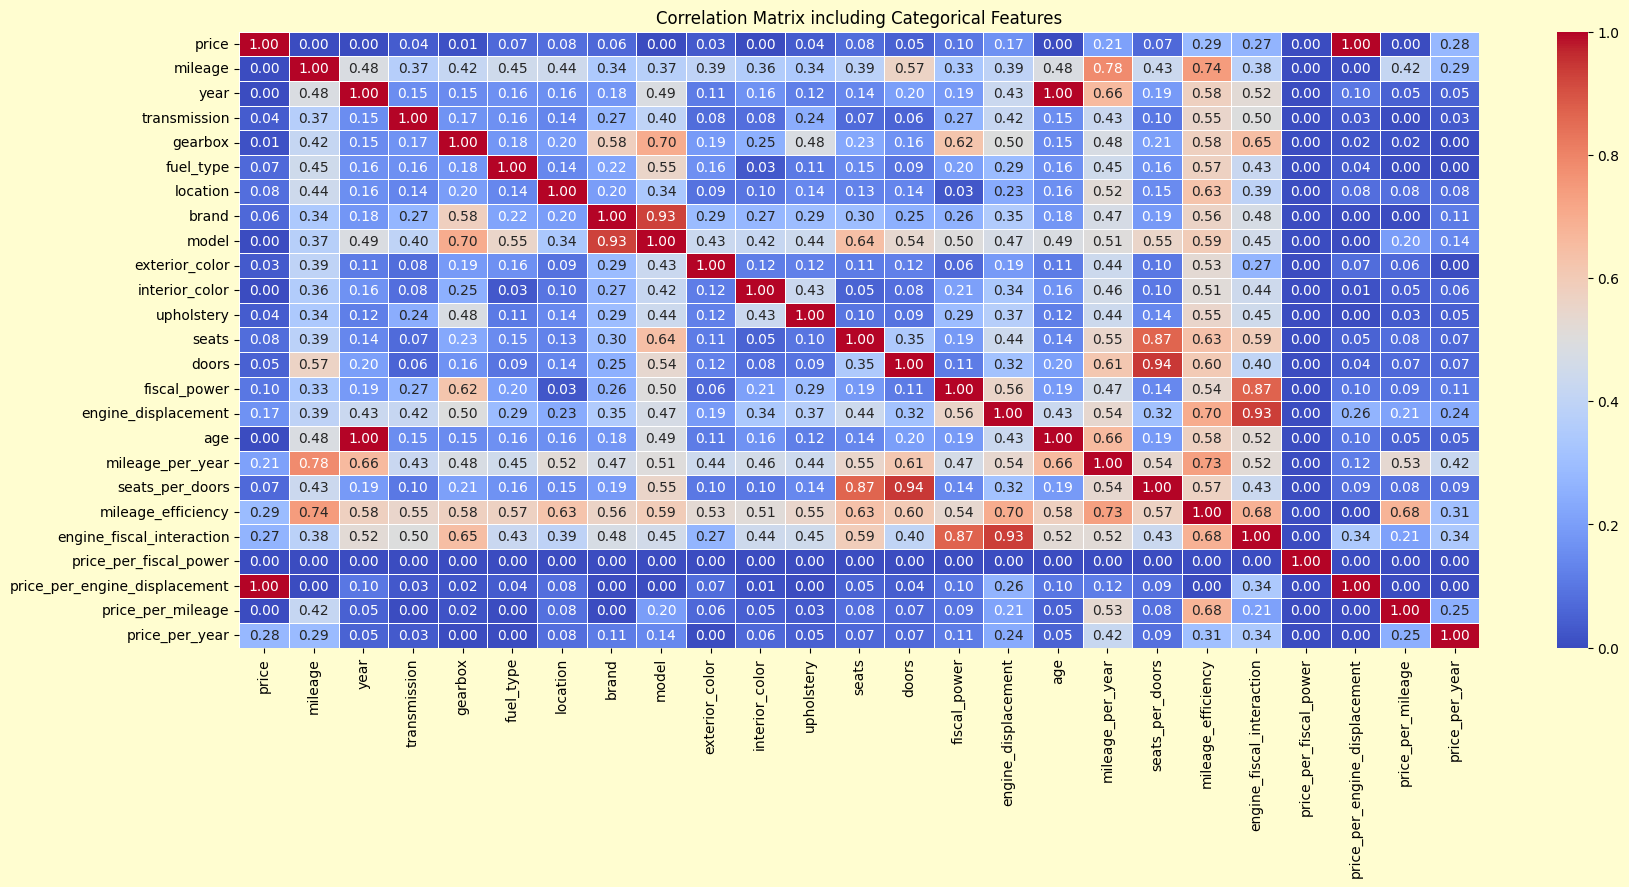

In [256]:
from dython.nominal import associations
associations_df = associations(df, nominal_columns='all', plot=False)
corr_matrix = associations_df['corr']
print(corr_matrix)
plt.figure(figsize=(20, 8))
plt.gcf().set_facecolor('#FFFDD0') 
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix including Categorical Features')
plt.show()


Mean Absolute Error: 3861.82
Mean Squared Error: 163879340.91
R^2: 0.97
                          feature  importance
21  price_per_engine_displacement    0.589345
19      engine_fiscal_interaction    0.173311
14            engine_displacement    0.080100
23                 price_per_year    0.069006
20         price_per_fiscal_power    0.036039
22              price_per_mileage    0.019900
13                   fiscal_power    0.015436
0                         mileage    0.003029
16               mileage_per_year    0.002477
4                       fuel_type    0.002361
7                           model    0.002231
18             mileage_efficiency    0.001379
1                            year    0.001123
6                           brand    0.000783
15                            age    0.000737
8                  exterior_color    0.000582
10                     upholstery    0.000379
5                        location    0.000360
9                  interior_color    0.000327
2       

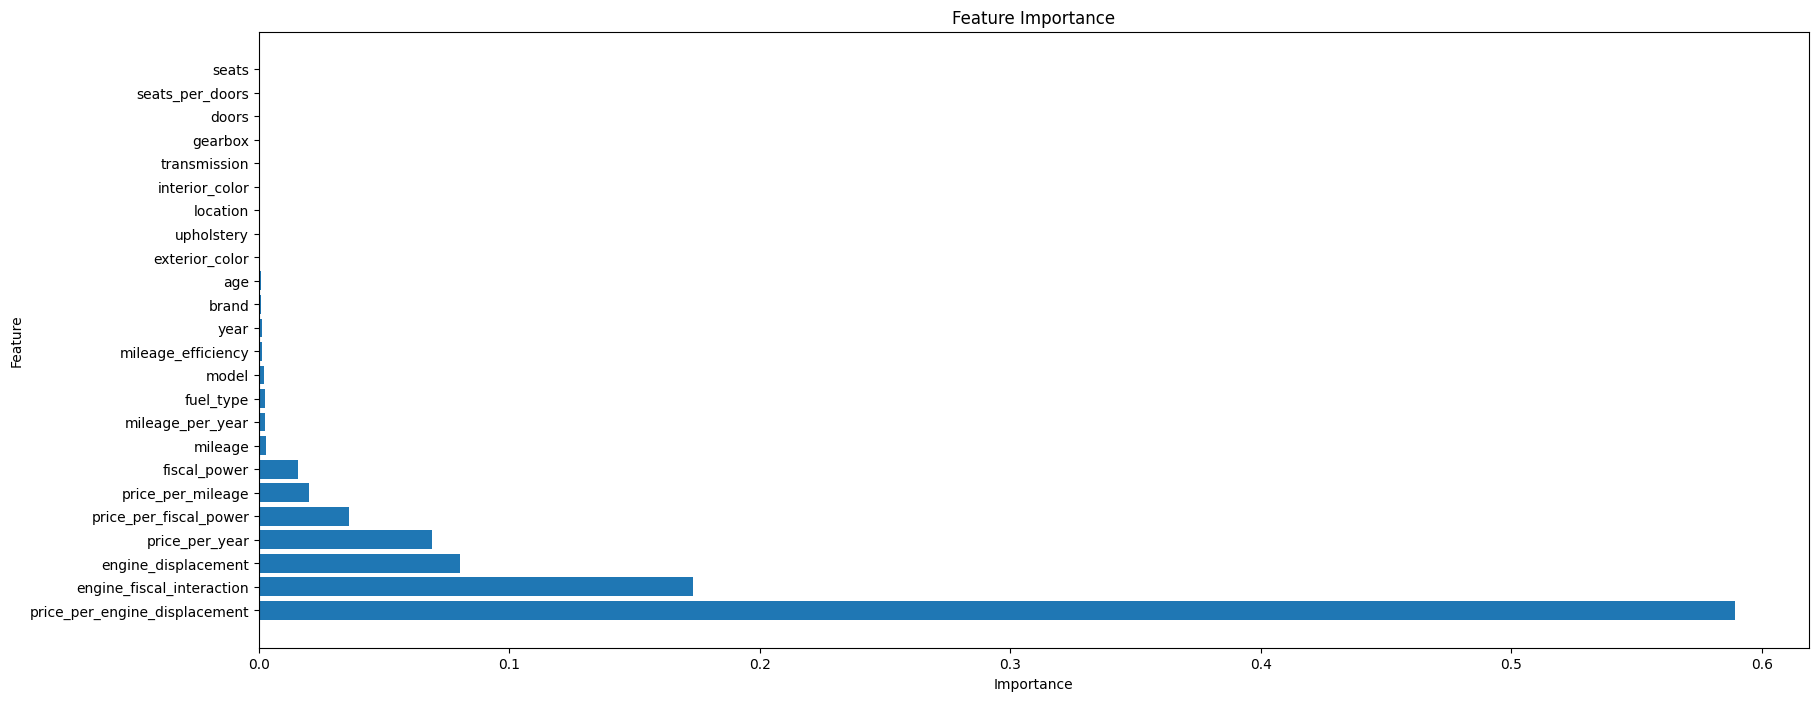

/tmp/ipykernel_522991/25923010.py:45: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=y_test, y=y_pred, palette='viridis')


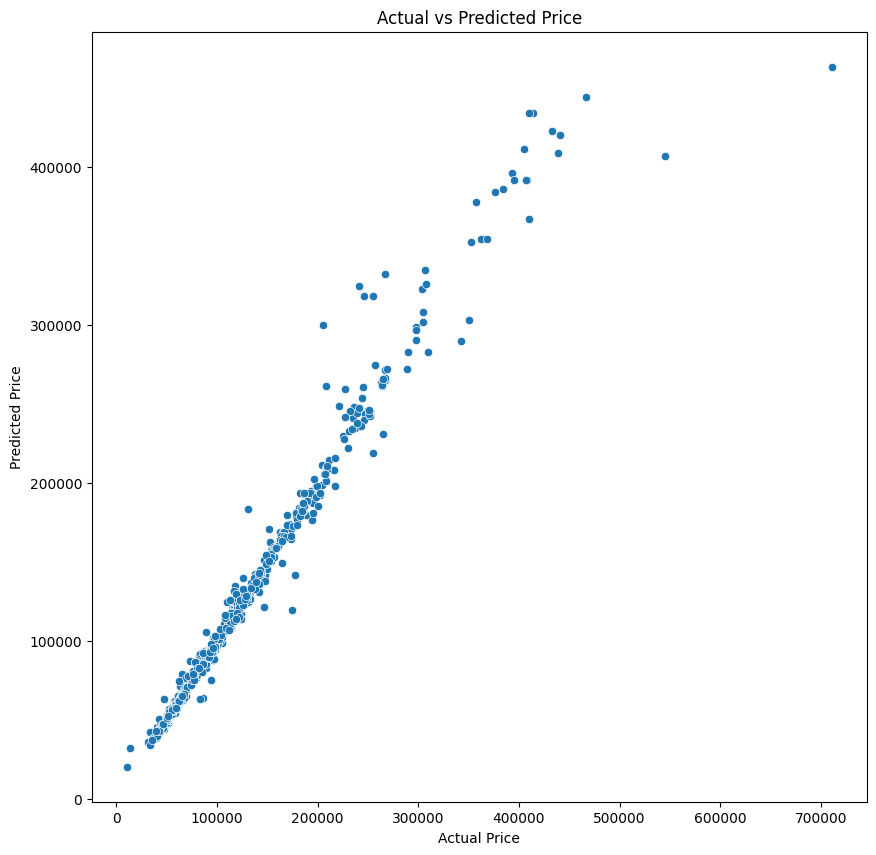

['label_encoders.pkl']

In [257]:
##testing random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

##save X_train 
X_train.to_csv("X_train.csv", index=False)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

r2 = r2_score(y_test, y_pred)
print(f'R^2: {r2:.2f}')



##feature importance
importances = model.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)

plt.figure(figsize=(20, 8))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


##plot predicted vs actual with seaborn and colors 
plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_pred, palette='viridis')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()


import joblib
import os
os.remove('model_random_forest.pkl')
os.remove('label_encoders.pkl')
joblib.dump(model, 'model_random_forest.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')



/tmp/ipykernel_522991/2975698179.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=y_test, y=y_pred, palette='viridis')


Mean Absolute Error: 23646.99
Mean Squared Error: 2520725337.52
R^2: 0.55


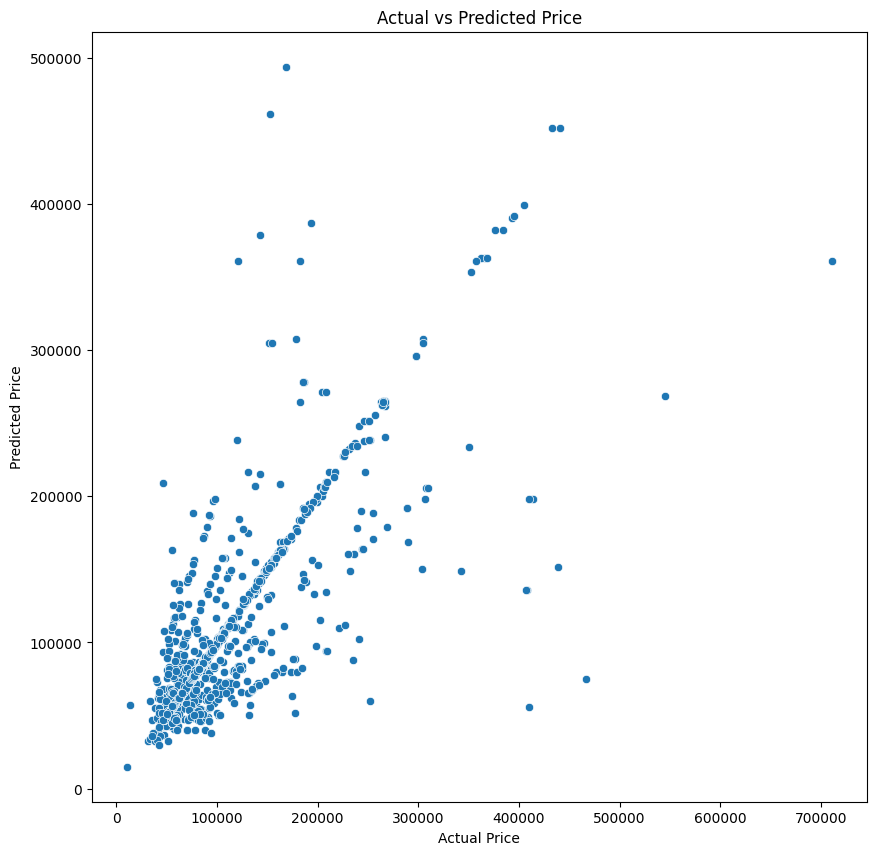

In [258]:
##knn
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

r2 = r2_score(y_test, y_pred)
print(f'R^2: {r2:.2f}')

##plot predicted vs actual with seaborn and colors
plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_pred, palette='viridis')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()


Mean Absolute Error: 5717.99
Mean Squared Error: 232069221.35
R^2: 0.96


/tmp/ipykernel_522991/2954583097.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=y_test, y=y_pred, palette='viridis')


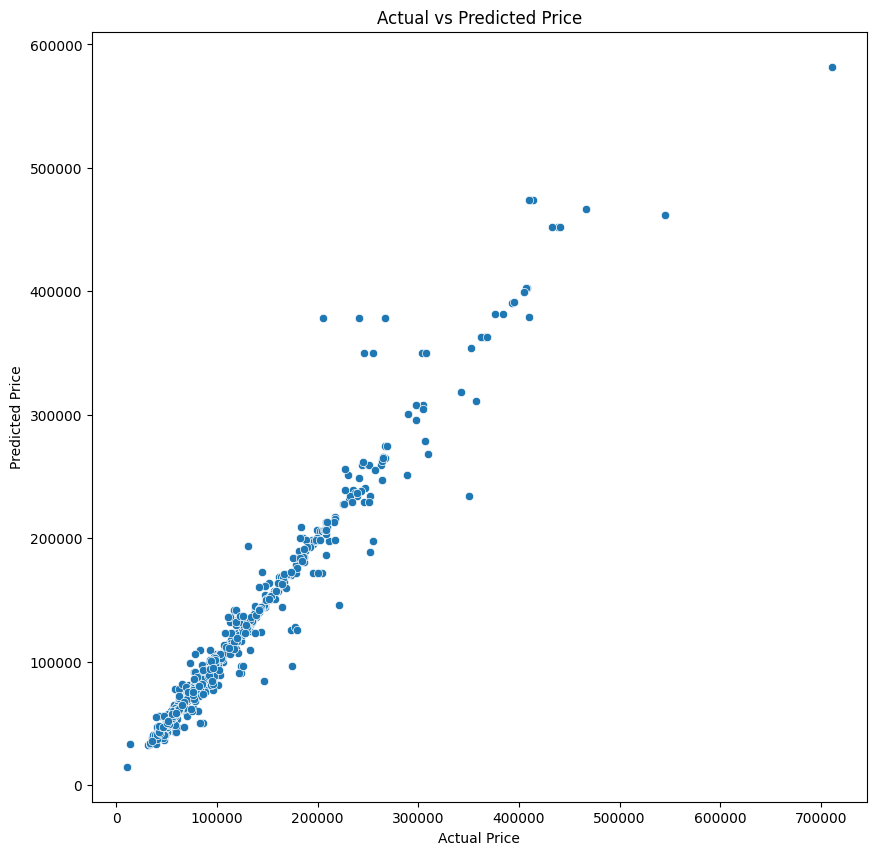

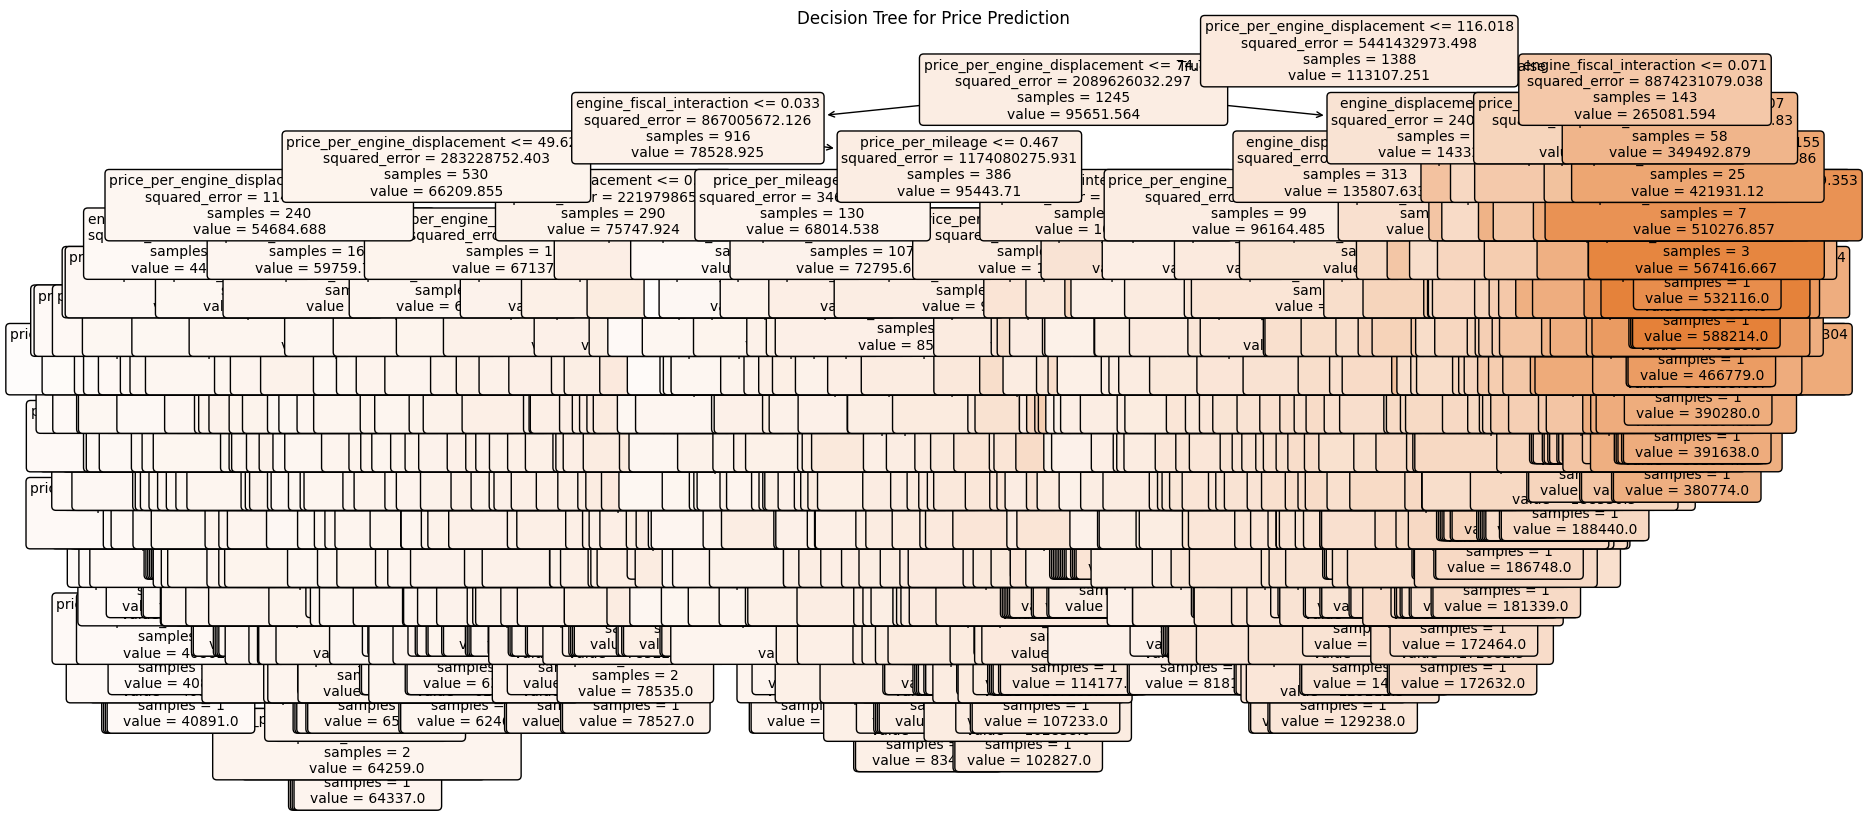

In [259]:
##decision tree
from sklearn.tree import DecisionTreeRegressor, plot_tree

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

r2 = r2_score(y_test, y_pred)
print(f'R^2: {r2:.2f}')

##plot predicted vs actual with seaborn and colors
plt.figure(figsize=(10, 10))

sns.scatterplot(x=y_test, y=y_pred, palette='viridis')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()


plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(model,
          feature_names=X.columns,
          filled=True,       # Color nodes by impurity
          rounded=True,      # Rounded corners for nodes
          fontsize=10)
plt.title("Decision Tree for Price Prediction")
plt.show()
